# Load Modules and Data Required

#### Import Modules

In [146]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os

Populating the interactive namespace from numpy and matplotlib


C:\Users\nedge\New folder\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'e', 'copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Load Data File

In [147]:
Results = 'ReportP22_to_P51.xls'
pX_Results = [pd.read_csv(Results, sep="\t")]
#pX_Results
Results_DF = pd.concat(pX_Results)

#### Generate List of Participants & Length of Trials

In [148]:
participant = Results_DF['Session_Name_'].unique() #get unique participant IDs
#participant = participant[14:]
trial_n = Results_DF['Trial_Index_'].unique() #get unique trial indeces
print("Number of participants:", len(participant))
print ("Number of trials:", len(trial_n))


Number of participants: 30
Number of trials: 280


#### Take P22:P30

In [149]:
columns = list(Results_DF)
Results_Stripped = pd.DataFrame(columns=columns)

for i in range(len(participant)):
    ResultsDFtemp = Results_DF.loc[Results_DF['Session_Name_'] == participant[i]]
    
    Results_Stripped = pd.concat([Results_Stripped, ResultsDFtemp])

In [150]:
#Results_Stripped

#### Generate New DF for analysing Performance

In [184]:
columns1 = ['participant','base','DeltaValue','Correct', 'Confidence Correct', 'Incorrect','Confidence Incorrect','Confidence Total', 'Performance'] 
counter=0
BaseCorr = pd.DataFrame(columns = columns1)


for k in range(len(participant)):
    for j in range(50,140,30):
        for m in range(-25,25,1):
            
            Correct1 = Results_Stripped.loc[(Results_Stripped['variance']==m) & (Results_Stripped['Session_Name_']==participant[k]) & ((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== 1)]  
            Incorrect1 = Results_Stripped.loc[(Results_Stripped['variance']==m) & (Results_Stripped['Session_Name_']==participant[k]) & ((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== -1)]
            
            BaseCorr.loc[counter,['participant']] = k
            BaseCorr.loc[counter,['base']] = j
            BaseCorr.loc[counter,['DeltaValue']] = m
            BaseCorr.loc[counter,['Correct']] = len(Correct1)
            BaseCorr.loc[counter,['Incorrect']] = len(Incorrect1)
            
            
            if len(Incorrect1) != 0:
                BaseCorr.loc[counter,['Performance']] = (len(Correct1)/(len(Incorrect1)+len(Correct1)))*100
                BaseCorr.loc[counter,['Confidence Incorrect']] = sum(Incorrect1['CONF'])/len(Incorrect1)
                BaseCorr.loc[counter,['Confidence Total']] = (sum(Incorrect1['CONF'])+sum(Correct1['CONF']))/(len(Incorrect1)+len(Correct1))
                #BaseCorr.loc[counter,['Confidence Correct']] = sum(Correct1['CONF'])/len(Correct1)
                if len(Correct1) != 0:
                    BaseCorr.loc[counter,['Confidence Correct']] = sum(Correct1['CONF'])/len(Correct1)
                
                counter+=1
            else:
                if len(Correct1) != 0:
                    BaseCorr.loc[counter,['Confidence Correct']] = sum(Correct1['CONF'])/len(Correct1)
                    BaseCorr.loc[counter,['Confidence Total']] = sum(Correct1['CONF'])/len(Correct1)
                    BaseCorr.loc[counter,['Performance']] = (len(Correct1)/(len(Incorrect1)+len(Correct1)))*100
            #print(j)
            #print(m)
            #print(k)
                counter +=1
#i=0
#for i in range(0,615,1):
    #if pd.to_numeric(BaseCorr.loc[i,['Correct']]).values[0] <= 0:
        #BaseCorr.drop(i, axis=0)
    #else:
        #a=1

#BaseCorr

#### Check for Left/Right Bias

In [241]:
columns2 = ['ChoseLeft', 'ChoseRight', 'PropRight','IncChoseLeft', 'IncChoseRight', 'IncPropRight','CorChoseLeft', 'CorChoseRight', 'CorPropRight', 'Handedness', 'Performance']
LRBias = pd.DataFrame(columns = columns2)
counter=0

for k in range(len(participant)):
    ChoseRight = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeft = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'MORE')]
    ChoseRightInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeftInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseRightCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeftCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'MORE')]
    
    
    LRBias.loc[counter,['ChoseLeft']] = len(ChoseLeft)
    LRBias.loc[counter,['ChoseRight']] = len(ChoseRight)
    LRBias.loc[counter,['PropRight']] = len(ChoseRight)/(len(ChoseRight)+len(ChoseLeft))
    LRBias.loc[counter,['IncChoseLeft']] = len(ChoseLeftInCorr)
    LRBias.loc[counter,['IncChoseRight']] = len(ChoseRightInCorr)
    LRBias.loc[counter,['IncPropRight']] = len(ChoseRightInCorr)/(len(ChoseRightInCorr)+len(ChoseLeftInCorr))
    LRBias.loc[counter,['CorChoseLeft']] = len(ChoseLeftCorr)
    LRBias.loc[counter,['CorChoseRight']] = len(ChoseRightCorr)
    LRBias.loc[counter,['CorPropRight']] = len(ChoseRightCorr)/(len(ChoseRightCorr)+len(ChoseLeftCorr))
    
    counter = counter +1
#LRBias

columns3 = ['ChoseLeft', 'ChoseRight', 'PropRight','IncChoseLeft', 'IncChoseRight', 'IncPropRight','CorChoseLeft', 'CorChoseRight', 'CorPropRight', 'Handedness', 'Performance']
LRBiasM = pd.DataFrame(columns = columns3)
counter=0

for k in range(len(participant)):
    ChoseRight = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeft = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'MORE')]
    ChoseRightInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeftInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseRightCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'MORE')]
    ChoseLeftCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'MORE')]
    
    
    LRBiasM.loc[counter,['ChoseLeft']] = len(ChoseLeft)
    LRBiasM.loc[counter,['ChoseRight']] = len(ChoseRight)
    LRBiasM.loc[counter,['PropRight']] = len(ChoseRight)/(len(ChoseRight)+len(ChoseLeft))
    LRBiasM.loc[counter,['IncChoseLeft']] = len(ChoseLeftInCorr)
    LRBiasM.loc[counter,['IncChoseRight']] = len(ChoseRightInCorr)
    LRBiasM.loc[counter,['IncPropRight']] = len(ChoseRightInCorr)/(len(ChoseRightInCorr)+len(ChoseLeftInCorr))
    LRBiasM.loc[counter,['CorChoseLeft']] = len(ChoseLeftCorr)
    LRBiasM.loc[counter,['CorChoseRight']] = len(ChoseRightCorr)
    LRBiasM.loc[counter,['CorPropRight']] = len(ChoseRightCorr)/(len(ChoseRightCorr)+len(ChoseLeftCorr))
    
    counter = counter +1
#LRBiasM

columns4 = ['ChoseLeft', 'ChoseRight', 'PropRight','IncChoseLeft', 'IncChoseRight', 'IncPropRight','IncRT','CorChoseLeft', 'CorChoseRight', 'CorPropRight','CorRT', 'Handedness', 'Performance']
LRBiasF = pd.DataFrame(columns = columns4)
counter=0

for k in range(len(participant)):
    ChoseRight = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['moreorless']== 'LESS')]
    ChoseLeft = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'LESS')]
    ChoseRightInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment')& (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'LESS')]
    ChoseLeftInCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'LESS')]
    ChoseRightCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='m') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'LESS')]
    ChoseLeftCorr = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['CHOICE_KEYPRESS']=='z') & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'LESS')]
    InCorrRT = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)& (Results_Stripped['moreorless']== 'LESS')]
    CorrRT = Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[k]) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)& (Results_Stripped['moreorless']== 'LESS')]
    
    LRBiasF.loc[counter,['ChoseLeft']] = len(ChoseLeft)
    LRBiasF.loc[counter,['ChoseRight']] = len(ChoseRight)
    LRBiasF.loc[counter,['PropRight']] = len(ChoseRight)/(len(ChoseRight)+len(ChoseLeft))
    LRBiasF.loc[counter,['IncChoseLeft']] = len(ChoseLeftInCorr)
    LRBiasF.loc[counter,['IncChoseRight']] = len(ChoseRightInCorr)
    LRBiasF.loc[counter,['IncPropRight']] = len(ChoseRightInCorr)/(len(ChoseRightInCorr)+len(ChoseLeftInCorr))
    LRBiasF.loc[counter,['CorChoseLeft']] = len(ChoseLeftCorr)
    LRBiasF.loc[counter,['CorChoseRight']] = len(ChoseRightCorr)
    LRBiasF.loc[counter,['CorPropRight']] = len(ChoseRightCorr)/(len(ChoseRightCorr)+len(ChoseLeftCorr))
    LRBiasF.loc[counter,['IncRT']] = sum(InCorrRT['CHOICE_RT'])/len(InCorrRT['CHOICE_RT'])
    LRBiasF.loc[counter,['CorRT']] = sum(CorrRT['CHOICE_RT'])/len(CorrRT['CHOICE_RT'])
    counter = counter +1
LRBiasF

ChoseLeft ChoseRight PropRight IncChoseLeft IncChoseRight IncPropRight  \
0         72         45  0.384615           22             8     0.266667   
1         71         47  0.398305           18             5     0.217391   
2         95         22  0.188034           44             7     0.137255   
3         70         48   0.40678           21             9          0.3   
4         93         24  0.205128           37             2    0.0512821   
5         80         38  0.322034           29             7     0.194444   
6         66         51  0.435897           26            18     0.409091   
7         73         45  0.381356           24             9     0.272727   
8         51         66  0.564103           23            30     0.566038   
9         86         32  0.271186           31             3    0.0882353   
10        79         38  0.324786           26             5      0.16129   
11        46         72  0.610169           13            25     0.657895   
12        60         57  0.487179           13            11     0.458333   
13        68         50  0.423729           19             9     0.321429   
14        85         32  0.273504           34             7     0.170732   
15        90         28  0.237288           36             4          0.1   
16        60         57  0.487179           15            13     0.464286   
17        73         45  0.381356           22             7     0.241379   
18        78         39  0.333333           31            11     0.261905   
19        69         49  0.415254           19             8     0.296296   
20        71         46  0.393162           21             8     0.275862   
21        65         53  0.449153           19            12     0.387097   
22        66         51  0.435897           15             7     0.318182   
23        53         65  0.550847           28            33     0.540984   
24        92         25  0.213675           35             1    0.0277778   
25        71         47  0.398305           21             8     0.275862   
26        69         48  0.410256           17             6      0.26087   
27        70         48   0.40678           24            12     0.333333   
28        66         51  0.435897           21            13     0.382353   
29        83         35   0.29661           29             4     0.121212   

      IncRT CorChoseLeft CorChoseRight CorPropRight    CorRT Handedness  \
0   2922.41           50            37     0.425287   2866.9        NaN   
1   10521.5           53            42     0.442105  7525.28        NaN   
2   1693.35           51            15     0.227273  1850.77        NaN   
3   3436.09           49            39     0.443182     3272        NaN   
4    8181.1           56            22     0.282051  5859.25        NaN   
5   2277.79           51            31     0.378049  2084.99        NaN   
6   5997.36           40            33     0.452055  4828.36        NaN   
7   2474.01           49            36     0.423529  2323.87        NaN   
8   4970.74           28            36       0.5625  4637.87        NaN   
9   5029.58           55            29     0.345238  4572.51        NaN   
10  3206.36           53            33     0.383721  3113.17        NaN   
11  1794.14           33            47       0.5875  1698.64        NaN   
12  2854.31           47            46     0.494624  2425.91        NaN   
13  5420.75           49            41     0.455556  4906.69        NaN   
14  1816.68           51            25     0.328947  2068.25        NaN   
15  2114.53           54            24     0.307692  2134.06        NaN   
16  5453.12           45            44     0.494382  5272.32        NaN   
17  2391.14           51            38     0.426966  2990.04        NaN   
18  2467.26           47            28     0.373333  2346.86        NaN   
19  3773.45           50            41     0.450549   2900.7        NaN   
20  3772.04           50            38  

In [153]:
LRBiasM['Performance'] = Bias_Scores['Performance']
LRBiasM

ChoseLeft ChoseRight PropRight IncChoseLeft IncChoseRight IncPropRight  \
0         46         72  0.610169            5            19     0.791667   
1         51         66  0.564103            8            16     0.666667   
2         18        100  0.847458            1            43     0.977273   
3         49         68  0.581197            8            18     0.692308   
4         31         87  0.737288            1            30     0.967742   
5         25         92  0.786325            2            36     0.947368   
6         54         64  0.542373           11            17     0.607143   
7         48         69  0.589744            8            19     0.703704   
8         52         66  0.559322           15            23     0.605263   
9         42         75  0.641026            8            25     0.757576   
10        42         76  0.644068            8            26     0.764706   
11        63         54  0.461538           20            16     0.444444   
12        60         58  0.491525           13            13          0.5   
13        54         63  0.538462           15            20     0.571429   
14        48         70   0.59322            9            21          0.7   
15        34         83  0.709402            4            29     0.878788   
16        47         71  0.601695           10            23      0.69697   
17        70         47  0.401709           15             4     0.210526   
18        45         73  0.618644            9            24     0.727273   
19        47         70  0.598291            9            21          0.7   
20        54         64  0.542373           13            19      0.59375   
21        60         57  0.487179           14            13     0.481481   
22        54         64  0.542373            7            13         0.65   
23        42         75  0.641026           12            29     0.707317   
24        51         67  0.567797            8            17         0.68   
25        50         67   0.57265            4            13     0.764706   
26        44         74  0.627119            6            22     0.785714   
27        34         83  0.709402            9            34     0.790698   
28        55         63  0.533898            6            11     0.647059   
29        45         72  0.615385            5            19     0.791667   

   CorChoseLeft CorChoseRight CorPropRight Handedness  Performance  
0            41            53      0.56383        NaN         78.0  
1            43            50     0.537634        NaN         80.0  
2            17            57      0.77027        NaN         60.0  
3            41            50     0.549451        NaN         76.0  
4            30            57     0.655172        NaN         70.0  
5            23            56     0.708861        NaN         69.0  
6            43            47     0.522222        NaN         70.0  
7            40            50     0.555556        NaN         75.0  
8            37            43       0.5375        NaN         62.0  
9            34            50     0.595238        NaN         72.0  
10           34            50     0.595238        NaN         72.0  
11           43            38     0.469136        NaN         69.0  
12           47            45      0.48913        NaN         79.0  
13           39            43      0.52439        NaN         73.0  
14           39            49     0.556818        NaN         70.0  
15           30            54     0.642857        NaN         70.0  
16           37            48     0.564706        NaN         73.0  
17           55            43     0.438776        NaN         80.0  
18           36            49     0.576471        NaN         69.0  
19           38            49     0.563218        NaN         76.0  
20           41            45     0.523256        NaN         74.0  
21           46            44     0.488889        NaN         75.0  
22           47            5

In [154]:
Results_Stripped_M = Results_Stripped.loc[(Results_Stripped['moreorless']== 'MORE')]
Results_Stripped_F = Results_Stripped.loc[(Results_Stripped['moreorless']== 'LESS')]

counter = 0
for i in range(len(Results_Stripped_F)):
    if Results_Stripped_F['DOTS_RIGHT'].values[i] > Results_Stripped_F['DOTS_LEFT'].values[i]:
        counter += 1

In [155]:
import numpy as np
import scipy
from scipy import stats


a = LRBiasM['IncPropRight'].values
b = LRBiasF['IncPropRight'].values
c = LRBiasM['CorPropRight'].values
d = LRBiasF['CorPropRight'].values
e = LRBiasM['PropRight'].values
f = LRBiasF['PropRight'].values

stats.ttest_rel(a, b)

#var_a = a.var(ddof=1)
#var_b = b.var(ddof=1)

Ttest_relResult(statistic=8.24116106425382, pvalue=4.3691414413777345e-09)

In [156]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "More", lab2 = "Fewer",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("ChoiceSlopes: MeanL = "+ str(mean(data1))+ "; MeanD = "+ str(mean(data2))+"; [Like - Dislike] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        if data1[i]<data2[i]:
            print ("Participants with slope in Like < Dislike: " + str(i))
            
    
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

ChoiceSlopes: MeanL = 0.5985585977111402; MeanD = 0.38406007050074853; [Like - Dislike] =  0.21449852721039164; t =  6.69 ; p-value =2.418365705481851e-07
Participants with slope in Like < Dislike: 8
Participants with slope in Like < Dislike: 11


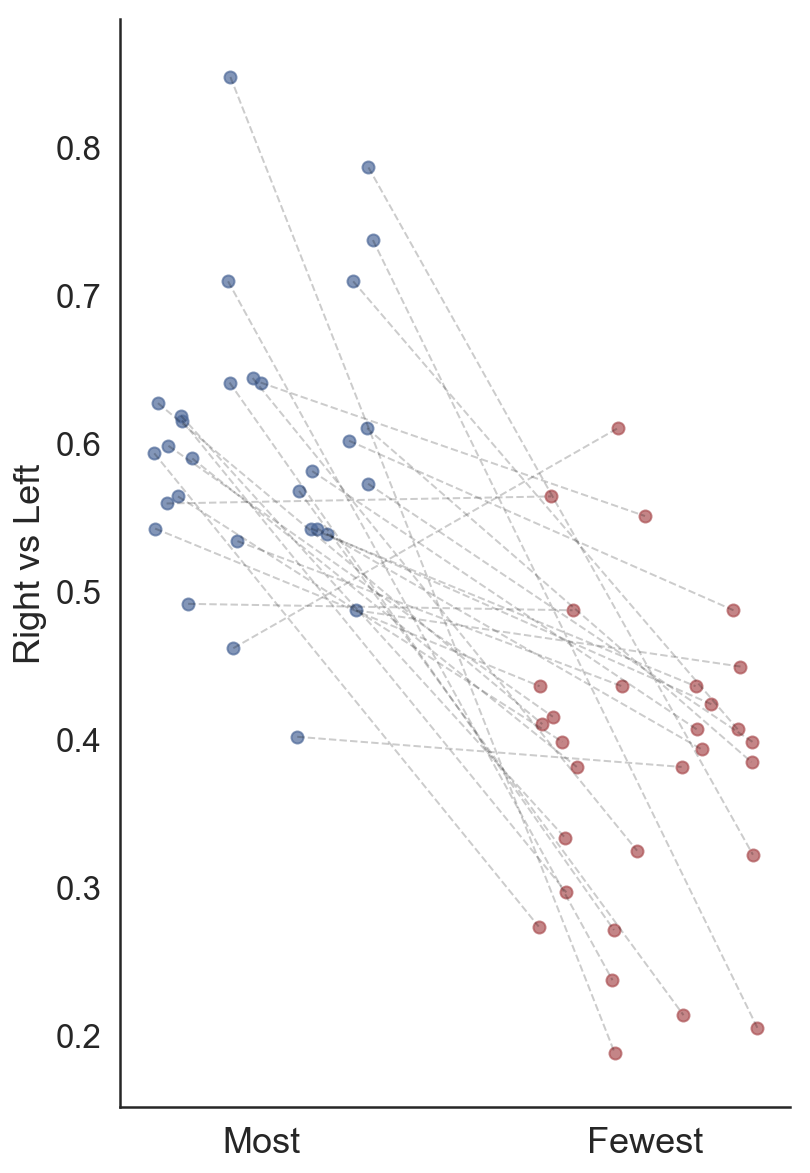

In [258]:
ttestsPlot(LRBiasM['PropRight'], LRBiasF['PropRight'],'#4F6A9A','#AC5255',"Most",  "Fewest",title = 'Right vs Left')

LinAlgError: SVD did not converge in Linear Least Squares

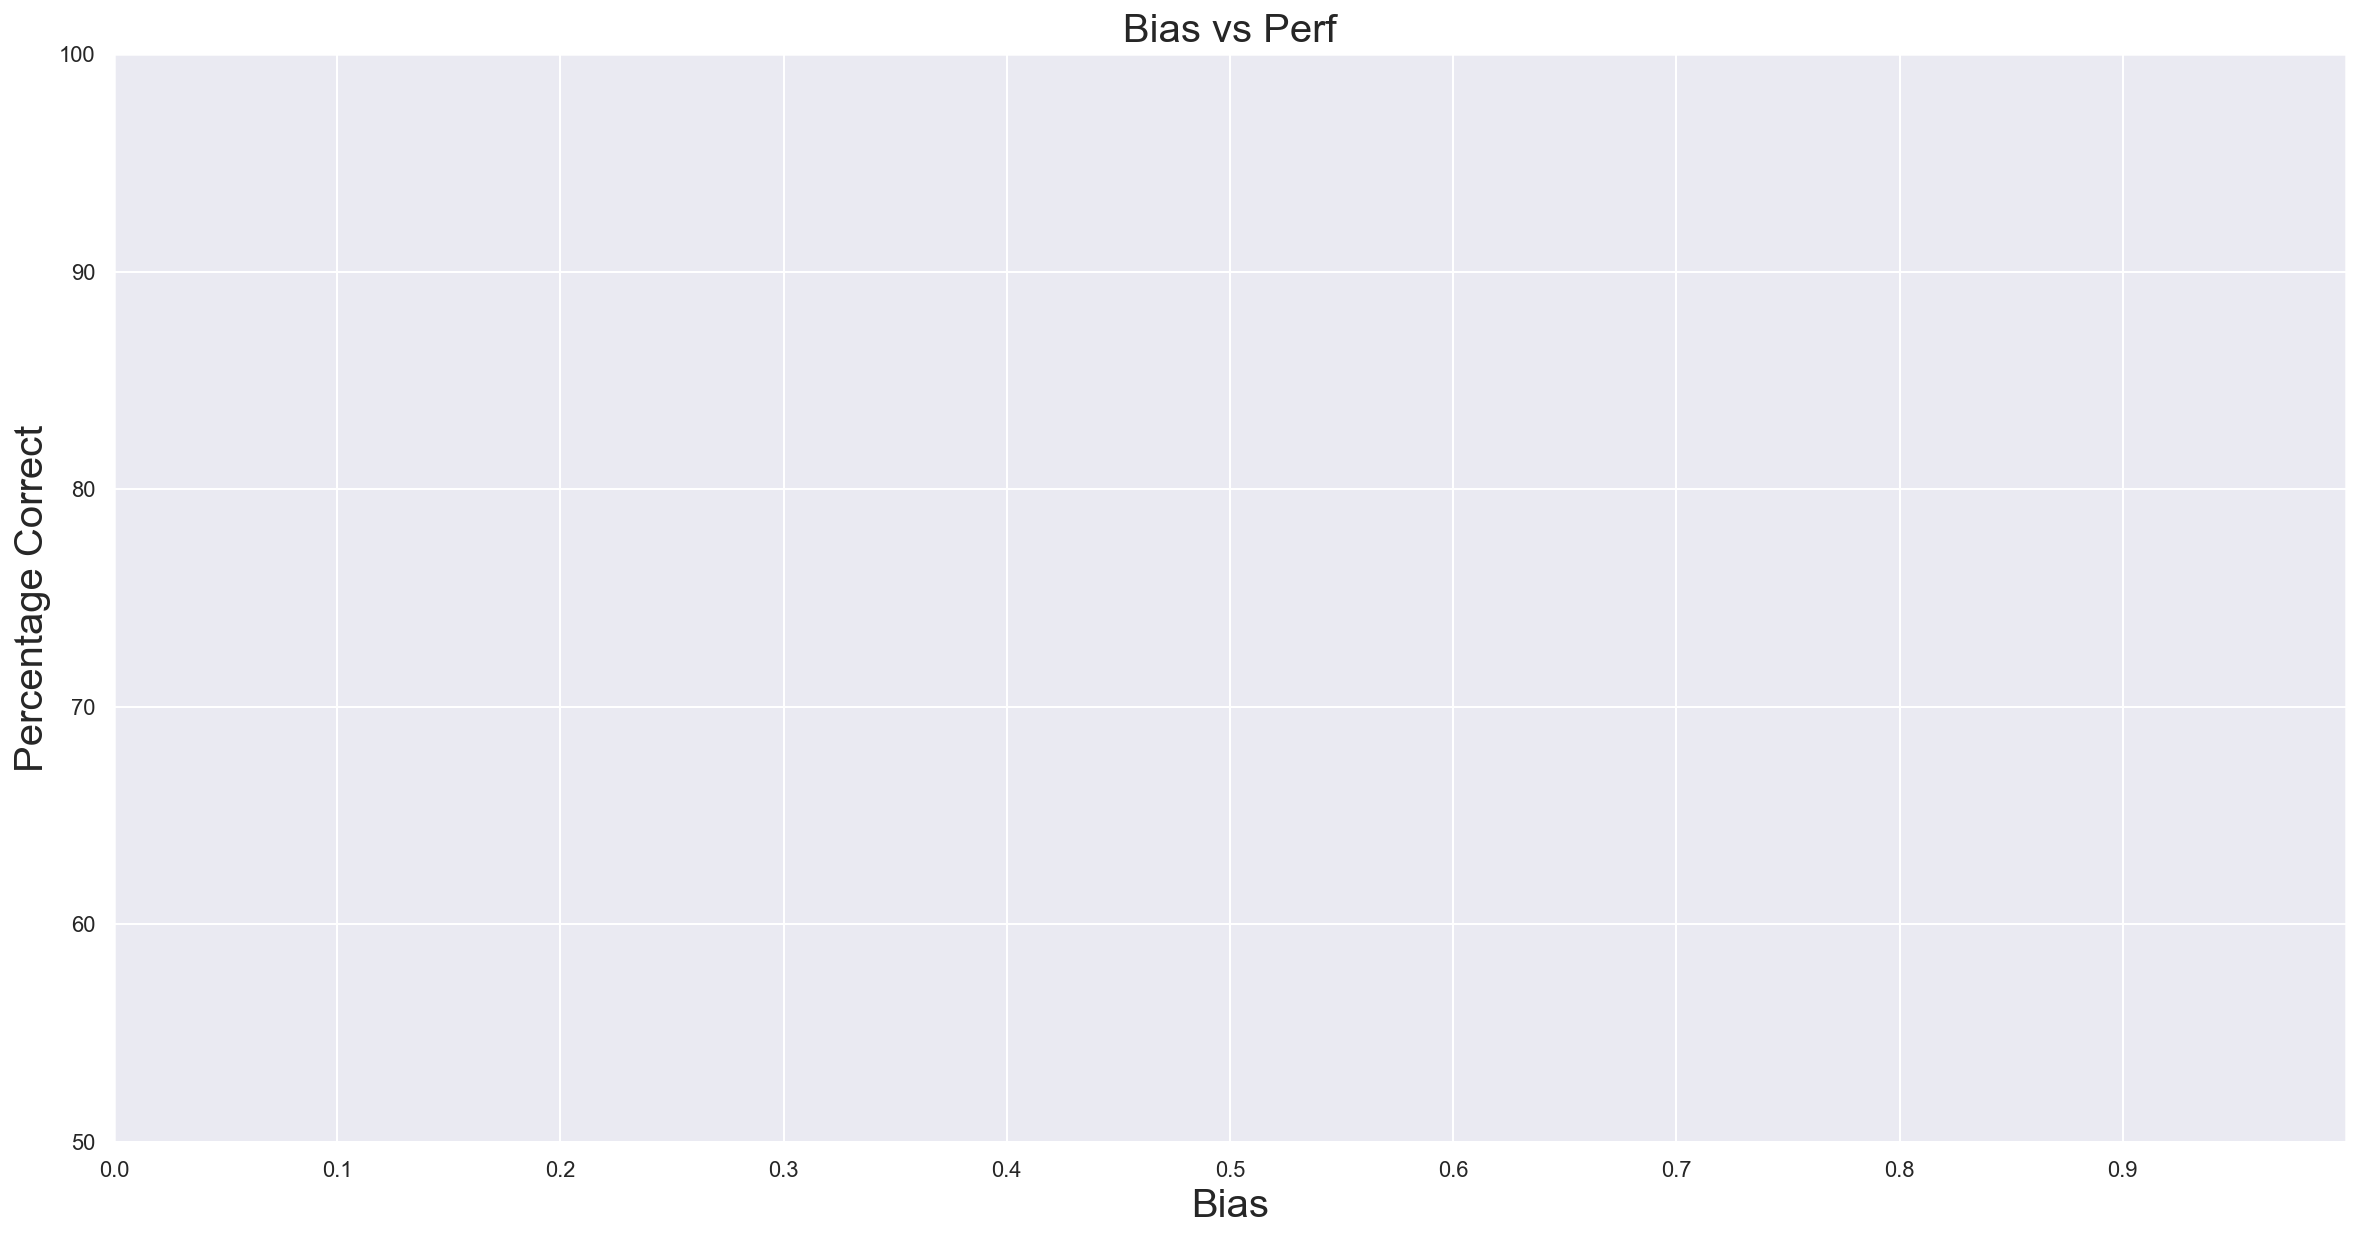

In [246]:
columns = ['Participant', 'BiasInc', 'BiasCor','Performance','IncRT', 'CorRT']
Bias_Scores = pd.DataFrame(columns = columns)
for i in range(len(participant)):
    Bias_Scores.loc[i, ['Participant']] = i+1
    Bias_Scores.loc[i, ['BiasInc']] = abs(LRBiasM['IncPropRight'][i] - 0.5) + abs(LRBiasF['IncPropRight'][i] - 0.5)
    Bias_Scores.loc[i, ['BiasCor']] = abs(LRBiasM['CorPropRight'][i] - 0.5) + abs(LRBiasF['CorPropRight'][i] - 0.5)
Bias_Scores['Performance'] = Participant_perf['Performance']

Bias = abs(pd.to_numeric(Bias_Scores['BiasInc']))
Perf = pd.to_numeric(Bias_Scores['Performance'])
fig = plt.figure()
#plt.axes()
ax = fig.add_subplot(111)
ax.set_title('Bias vs Perf',fontsize=20)

ax.set_xlabel('Bias', fontsize=20)
ax.set_ylabel('Percentage Correct',fontsize=20)
ax.set_xticks(np.arange(0,1,step=0.1))
ax.set_ylim([50,100])
x = pd.to_numeric(Bias)
height = pd.to_numeric(Perf)
#plt.bar(x,height, width=1.4, align='center', color='purple')
#plt.plot(x, height, color = 'red')
fit = np.polyfit(x,height,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#plt.plot(x,height, 'o', x, fit_fn(x), 'r')

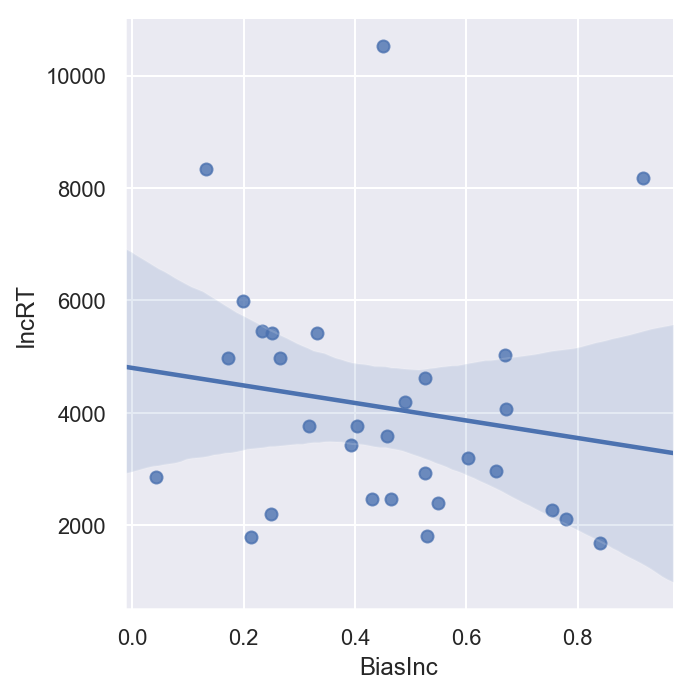

In [256]:
#Bias_Scores['Bias'] = pd.to_numeric(Bias_Scores['Bias'])
Bias_Scores['Performance'] = pd.to_numeric(Bias_Scores['Performance'])
Bias_Scores['CorRT'] = pd.to_numeric(LRBiasF['CorRT'])
Bias_Scores['IncRT'] = pd.to_numeric(LRBiasF['IncRT'])
Bias_Scores['BiasInc'] = pd.to_numeric(Bias_Scores['BiasInc'])

sns.set(rc={'figure.figsize':(20,10)})
sns.lmplot(x='BiasInc', y='IncRT', data=Bias_Scores)

In [257]:
model = Lm('IncRT ~ BiasInc', data = Bias_Scores)
model.fit()

Formula: IncRT ~ BiasInc

Family: gaussian

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 30	 R^2: 0.027	 R^2_adj: -0.008

Log-likelihood: -271.246 	 AIC: 546.492	 BIC: 549.294

Fixed effects:



Estimate    2.5_ci   97.5_ci        SE  DF  T-stat  P-val  Sig
Intercept  4799.355  2983.946  6614.764   886.254  28   5.415  0.000  ***
BiasInc   -1558.243 -5189.199  2072.713  1772.575  28  -0.879  0.387

ChoiceSlopes: MeanL = 0.16508337865738396; MeanD = 0.44999857516041963; [Like - Dislike] =  -0.28491519650303565; t =  -11.5 ; p-value =2.5317178678923945e-12
Participants with slope in Like < Dislike: 0
Participants with slope in Like < Dislike: 1
Participants with slope in Like < Dislike: 2
Participants with slope in Like < Dislike: 3
Participants with slope in Like < Dislike: 4
Participants with slope in Like < Dislike: 5
Participants with slope in Like < Dislike: 6
Participants with slope in Like < Dislike: 7
Participants with slope in Like < Dislike: 8
Participants with slope in Like < Dislike: 9
Participants with slope in Like < Dislike: 10
Participants with slope in Like < Dislike: 11
Participants with slope in Like < Dislike: 12
Participants with slope in Like < Dislike: 13
Participants with slope in Like < Dislike: 14
Participants with slope in Like < Dislike: 15
Participants with slope in Like < Dislike: 16
Participants with slope in Like < Dislike: 17
Participants with slope

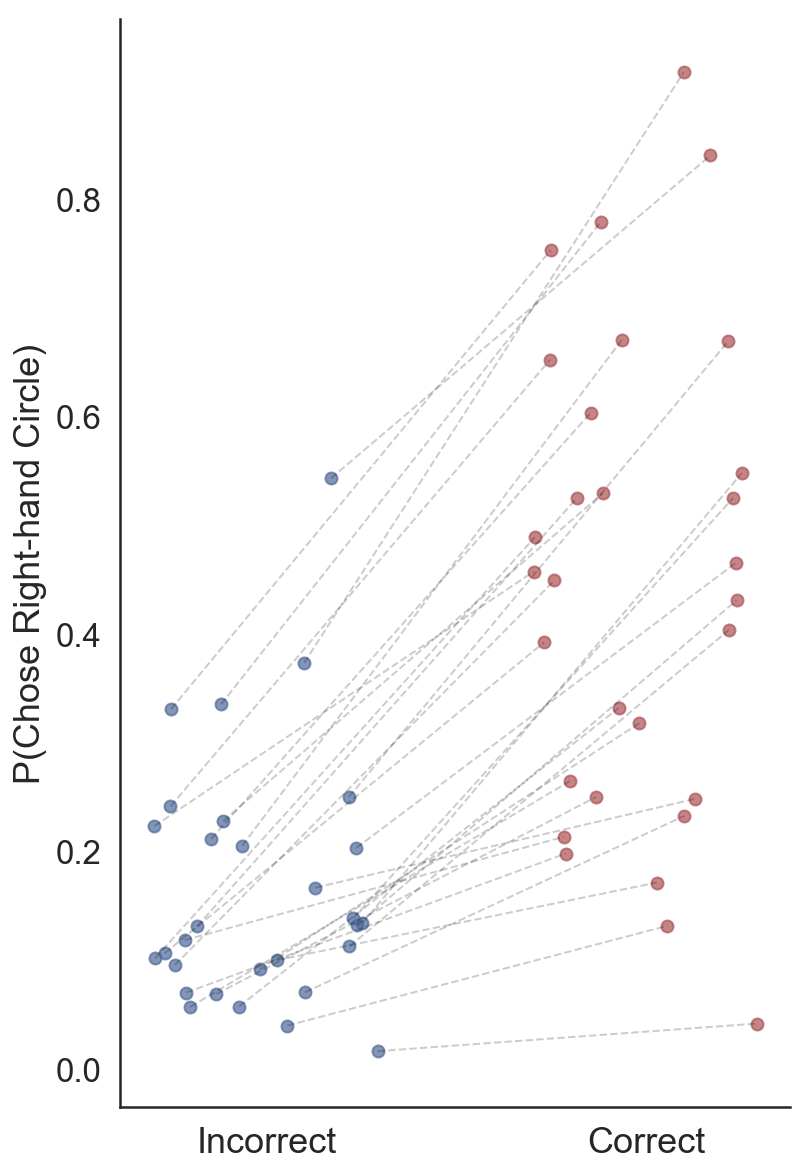

In [239]:
a = LRBiasM['CorPropRight']
b = LRBiasF['CorPropRight']
c = LRBiasM['IncPropRight']
d = LRBiasF['IncPropRight']
e = LRBiasM['PropRight']
f =LRBiasF['PropRight']


ttestsPlot(Bias_Scores['BiasCor'], Bias_Scores['BiasInc'],'#4F6A9A','#AC5255',"Incorrect",  "Correct",title = 'P(Chose Right-hand Circle)')
#plt.savefig('SavedFigures/SlopesConfidenceComparison.svg', format='svg', dpi = 500 )

#For example, early research
#suggested that the second stimulus is more often selected as the one of higher intensity, a
#phenomenon called time-order errors (Fechner 1860; Osgood 1953). 
savefig('Bias Change from Correct vs Incorrect.png')

#### Remove NaNs caused by missing DeltaValues

In [189]:
Performance = BaseCorr['Performance']
UsableData = np.isfinite(pd.to_numeric(Performance))
BaseCorrClean = BaseCorr[UsableData]
pd.DataFrame(BaseCorrClean)

participant base DeltaValue Correct Confidence Correct Incorrect  \
15             0   50        -10       3                 76         1   
16             0   50         -9       4                 83         0   
17             0   50         -8       3            57.3333         1   
18             0   50         -7       1                 84         3   
19             0   50         -6       4                 64         0   
20             0   50         -5       4                 59         0   
21             0   50         -4       3            60.6667         1   
22             0   50         -3       2                 34         2   
23             0   50         -2       3            70.6667         1   
24             0   50         -1       2                 69         2   
26             0   50          1       4               71.5         0   
27             0   50          2       3            67.3333         1   
28             0   50          3       4                 53         0   
29             0   50          4       2                 64         2   
30             0   50          5       2                 74         2   
31             0   50          6       3            70.6667         1   
32             0   50          7       2                 64         2   
33             0   50          8       3            67.3333         1   
34             0   50          9       4                 64         0   
35             0   50         10       3            80.6667         1   
59             0   80        -16       4               70.5         0   
61             0   80        -14       4                 68         0   
62             0   80        -13       2                 64         2   
64             0   80        -11       4               61.5         0   
65             0   80        -10       3            67.3333         1   
67             0   80         -8       3            70.6667         1   
69             0   80         -6       3                 76         1   
70             0   80         -5       2                 74         2   
72             0   80         -3       2                 44         2   
73             0   80         -2       2                 87         2   
...          ...  ...        ...     ...                ...       ...   
4427          29   80          2       3            23.3333         1   
4428          29   80          3       3            23.3333         1   
4430          29   80          5       2                 20         2   
4431          29   80          6       3            16.6667         1   
4433          29   80          8       4               27.5         0   
4435          29   80         10       4                 30         0   
4436          29   80         11       3            23.3333         1   
4438          29   80         13       2                 15         2   
4439          29   80         14       4                 25         0   
4441          29   80         16       4               32.5         0   
4452          29  110        -23       4               57.5         0   
4454          29  110        -21       4               42.5         0   
4457          29  110        -18       4                 30         0   
4459          29  110        -16       4                  5         0   
4461          29  110        -14       3                 30         1   
4463          29  110        -12       3            23.3333         1   
4466          29  110         -9       3            3.33333         1   
4468          29  110         -7       2                  5         2   
4470          29  110         -5       3            33.3333         1   
4473          29  110         -2       3            23.3333         1   
4477          29  110          2       3                 10         1   
4480          29  110          5       3            16.6667         1   
4482          29  110          7       2                 15    

### Plot Performance 

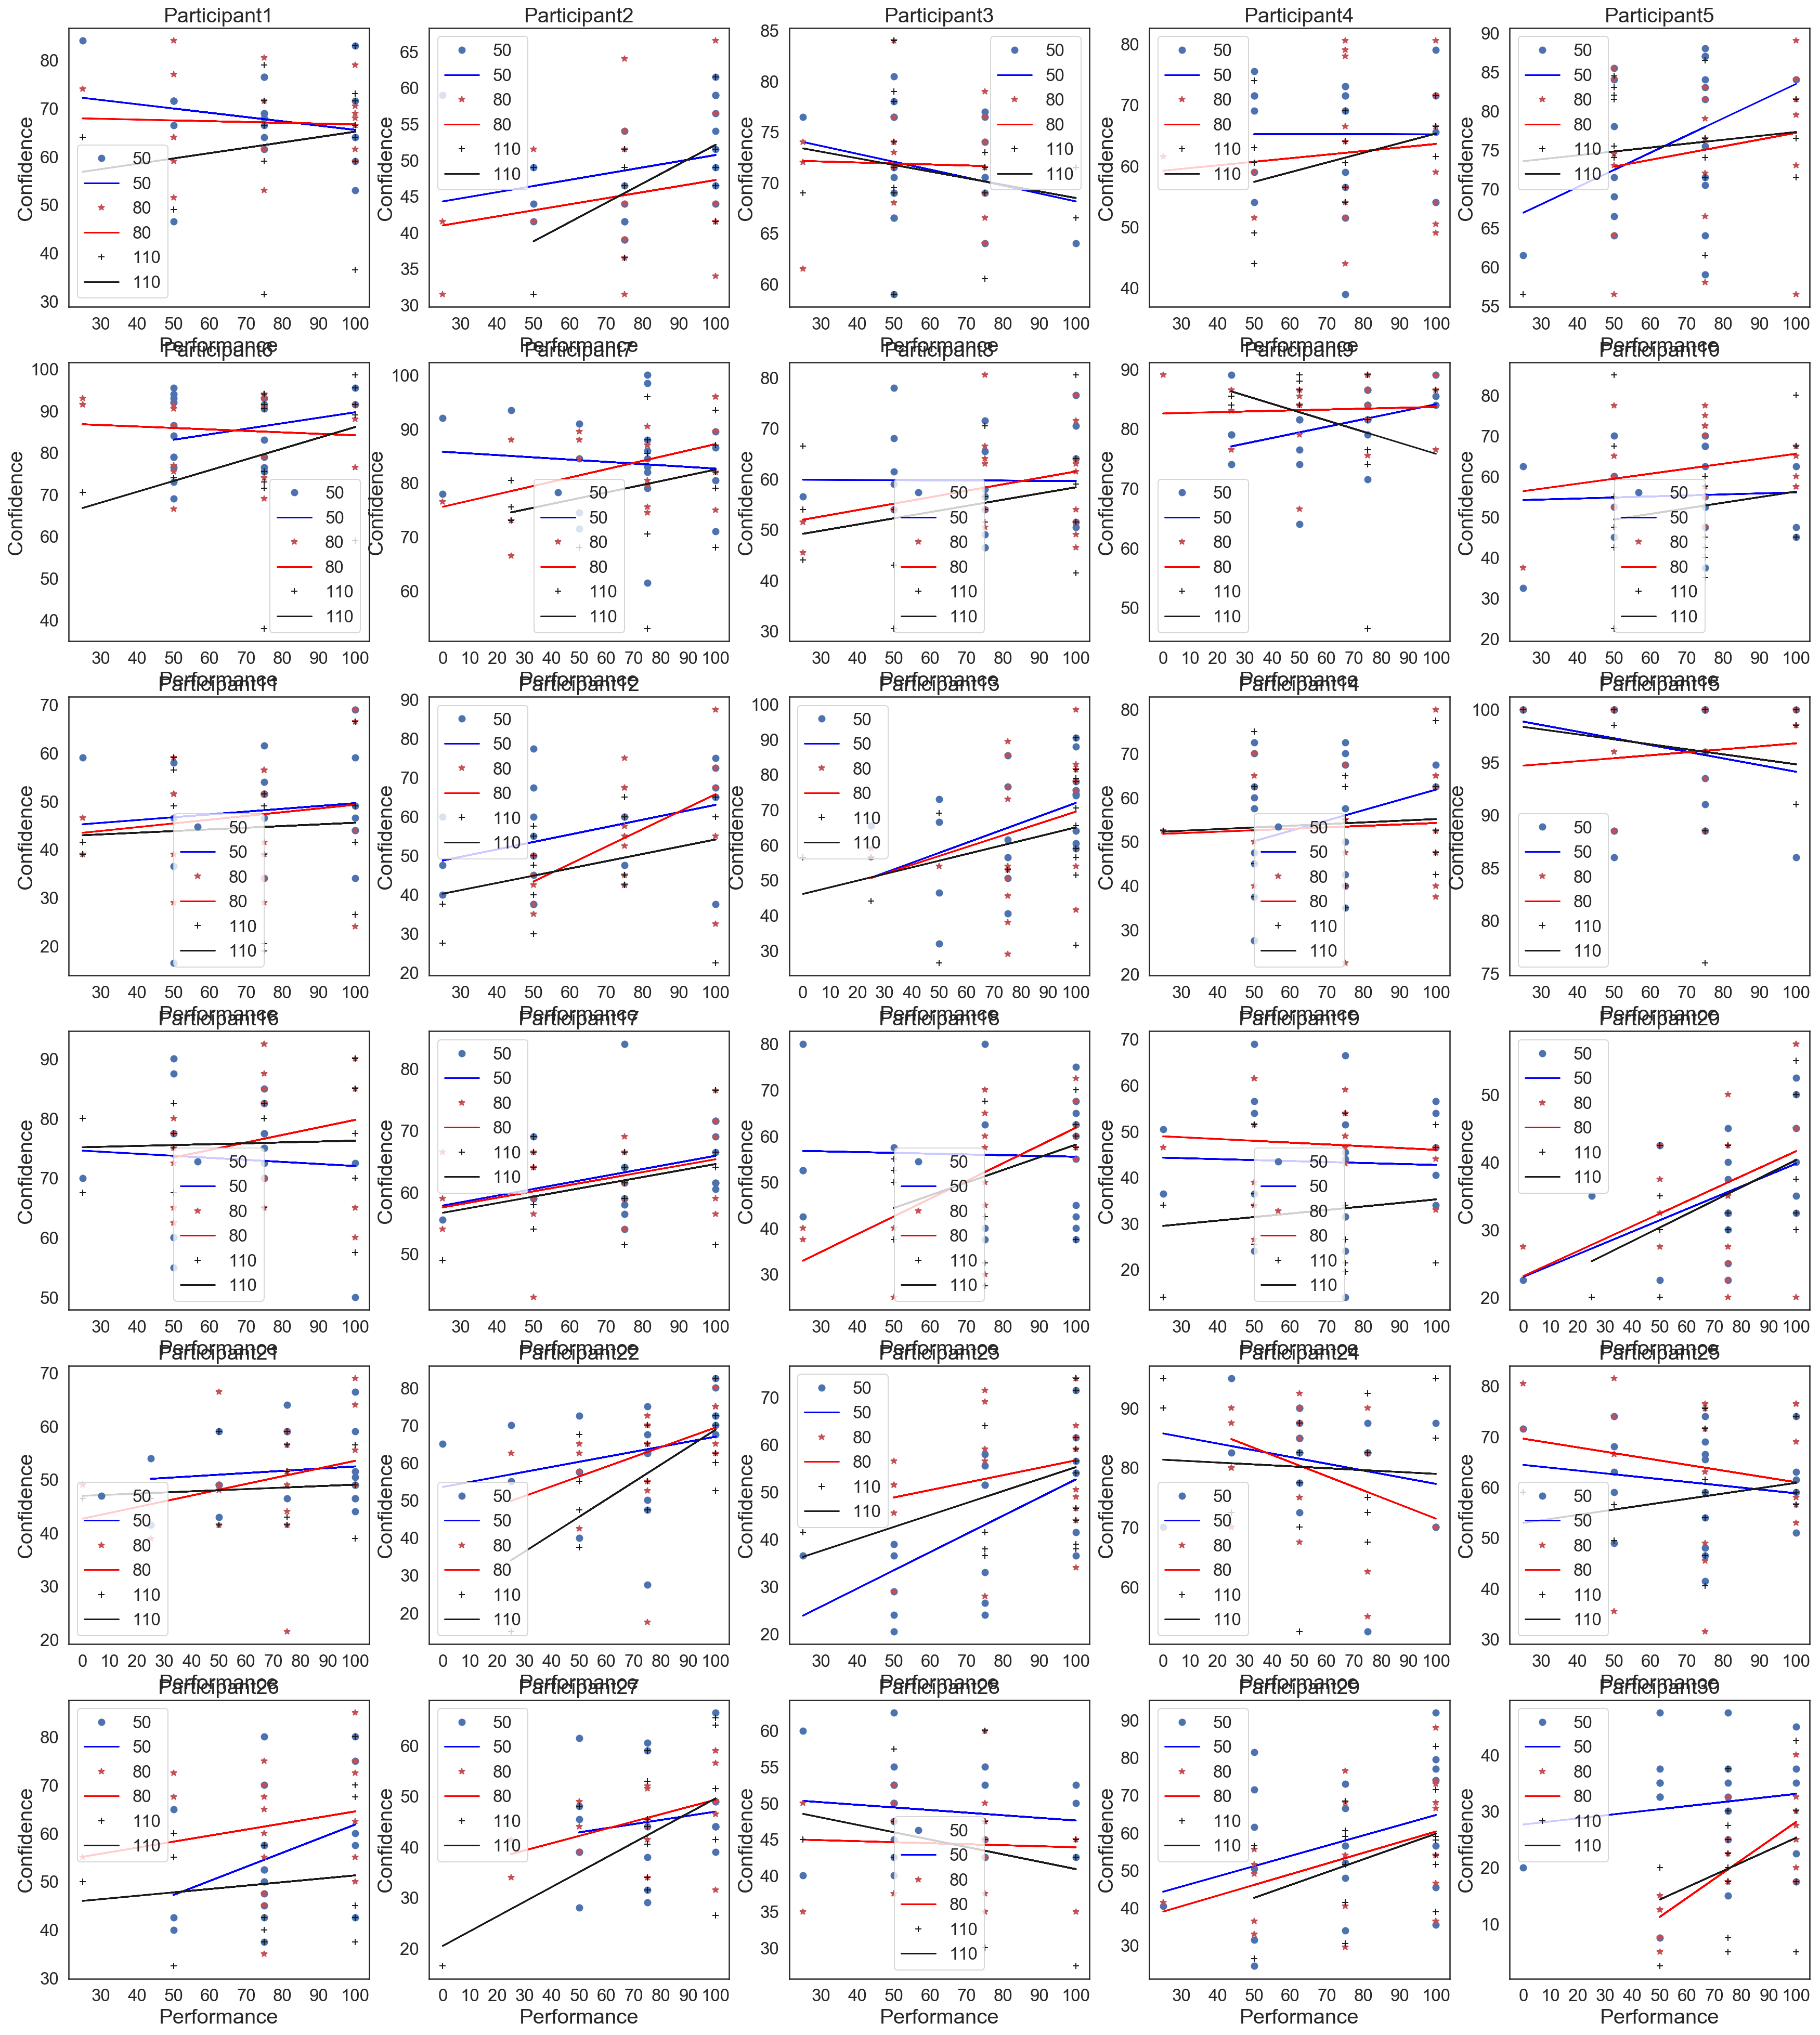

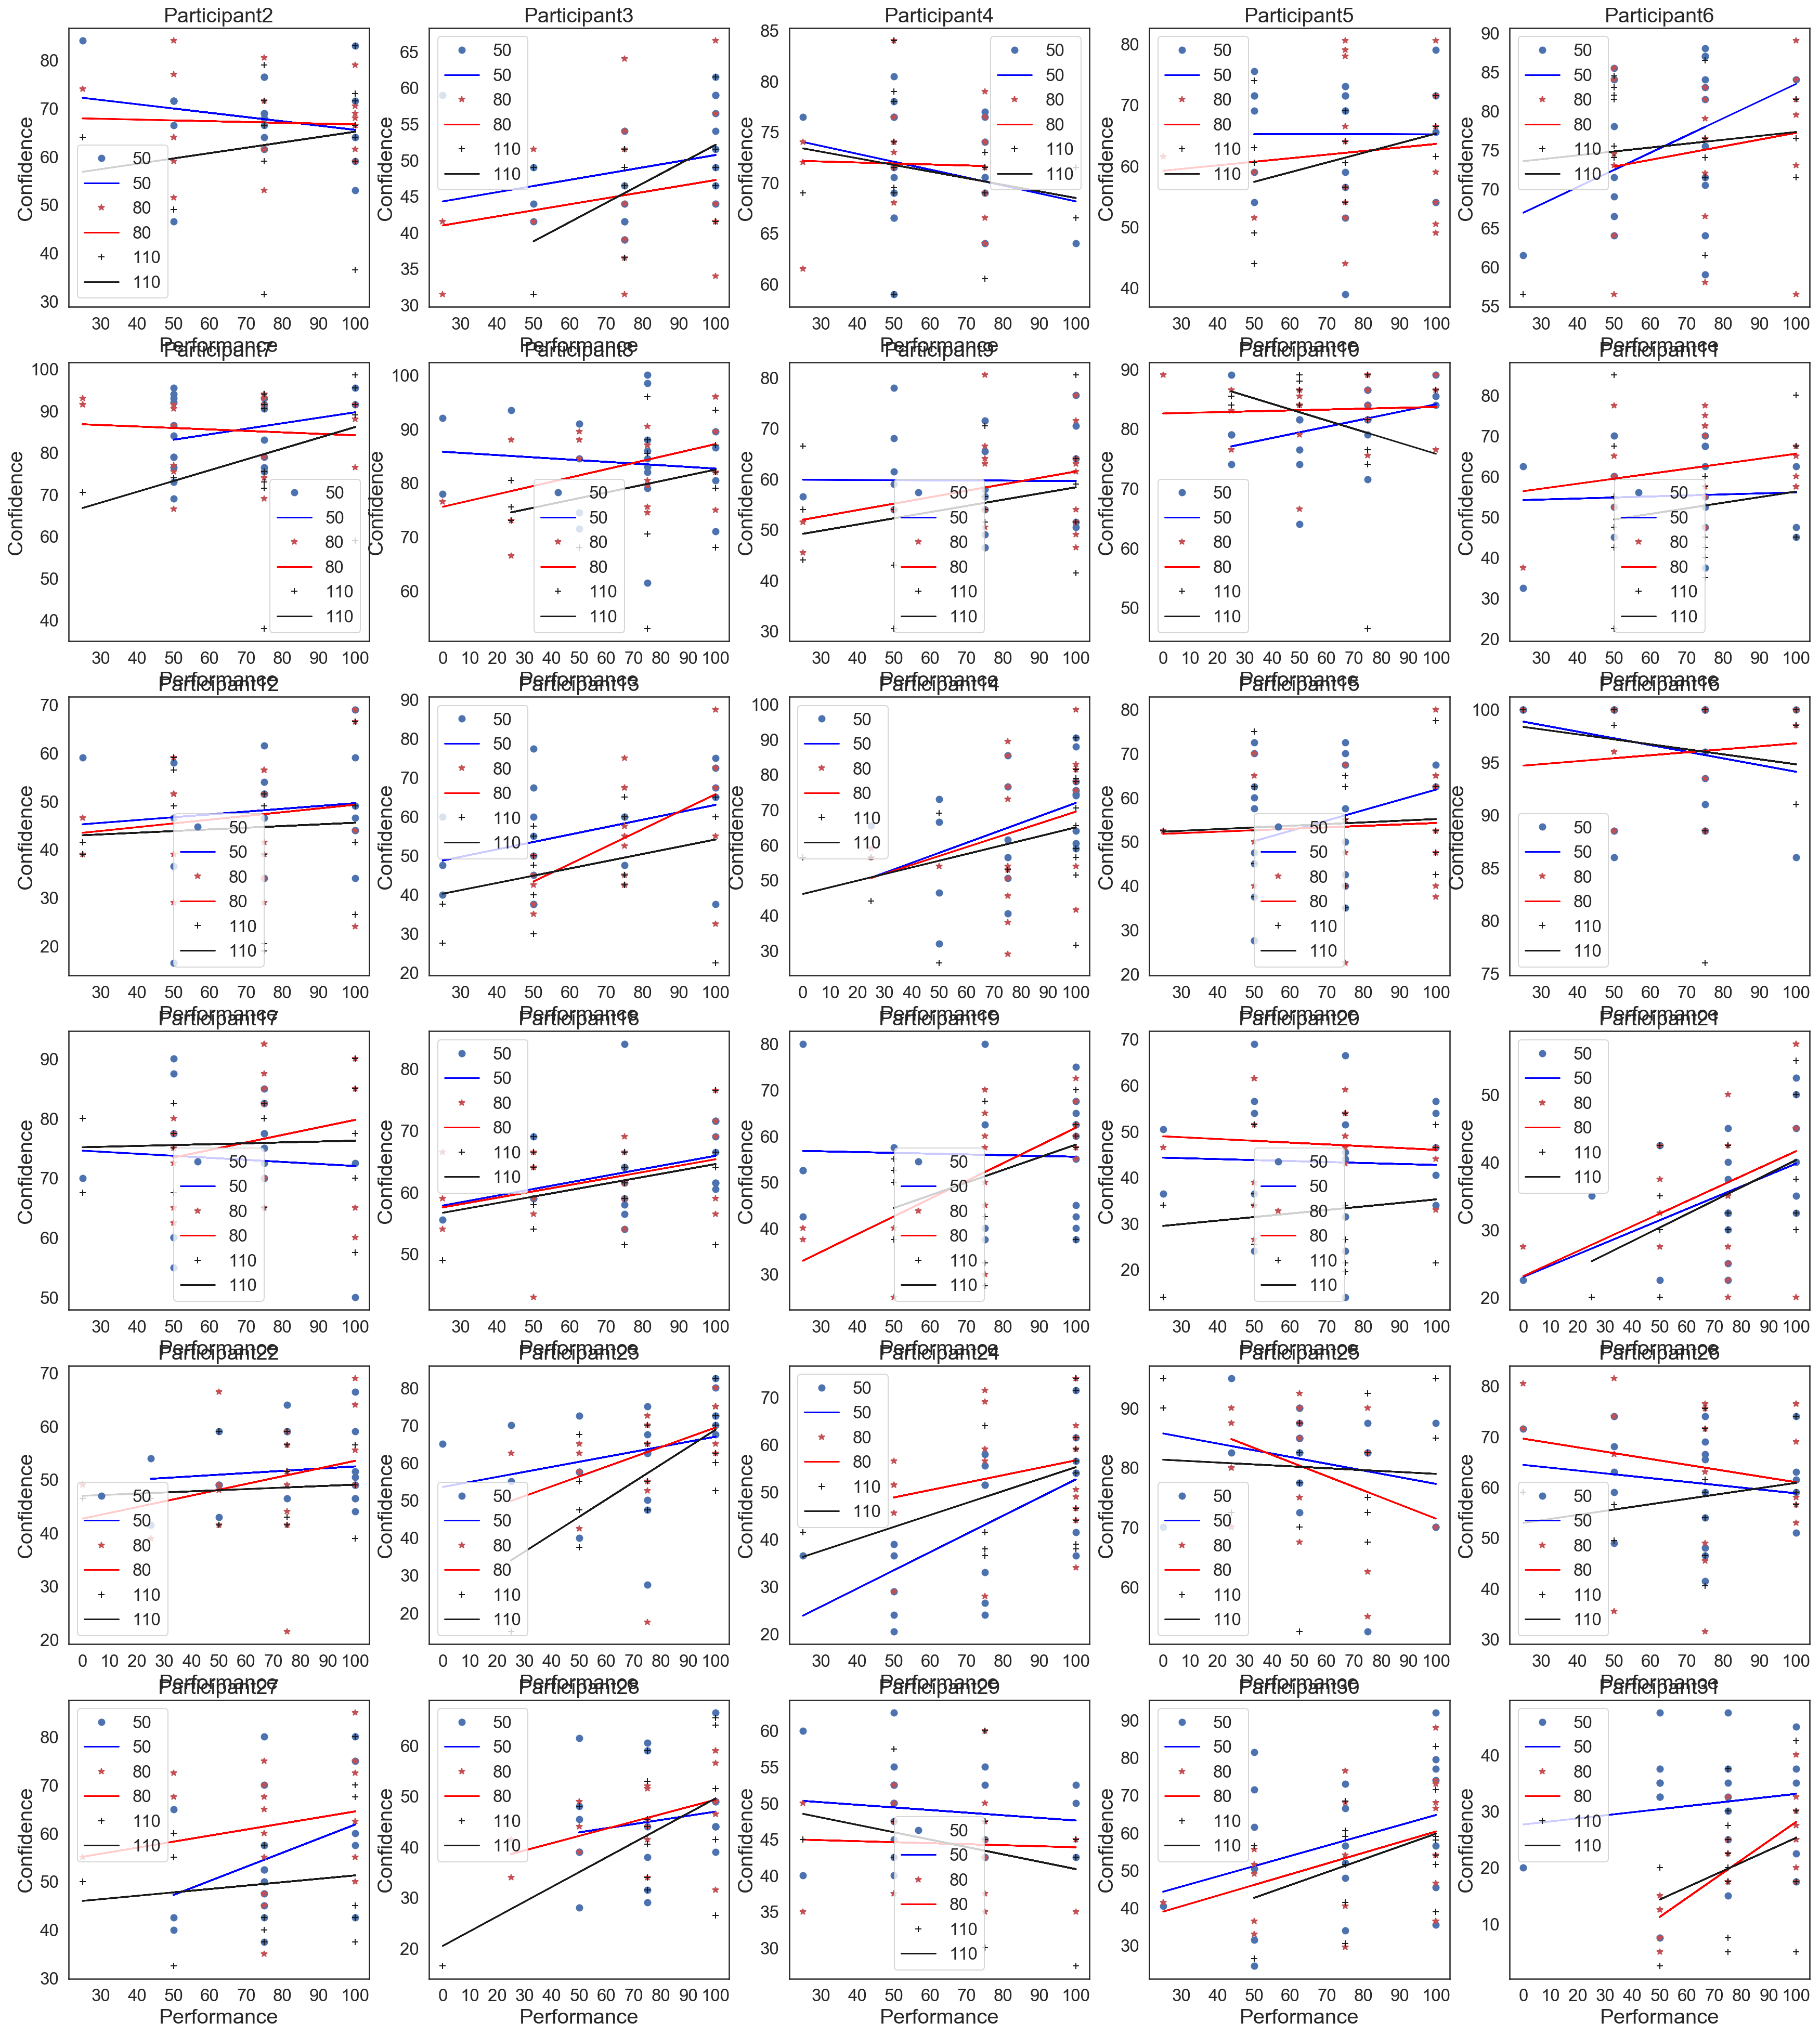

In [163]:
from pylab import *
fig = plt.figure(figsize=(30,70))

#fig = plt.figure(figsize=(5,5))
plt.tight_layout()

for i in range(len(participant)):
    sub = {}
    sub[i] = plt.subplot(12,5,i+1)
    title("Participant"+str(i+1),fontsize=20)
    xlabel('Performance', fontsize=20)
    ylabel('Confidence',fontsize=20)
    xticks(np.arange(0, 110, step=10))

    #separate by base
    LowC = BaseCorrClean.loc[(BaseCorrClean['base'] == 50.0) & (BaseCorrClean['participant']==i)]
    MedC = BaseCorrClean.loc[(BaseCorrClean['base'] == 80.0) & (BaseCorrClean['participant']==i)]
    HiC = BaseCorrClean.loc[(BaseCorrClean['base'] == 110.0) & (BaseCorrClean['participant']==i)]

    #get polyfits
    xLowC = pd.to_numeric(LowC['Performance'])
    yLowC = pd.to_numeric(LowC['Confidence Total'])
    fitLowC = np.polyfit(xLowC,yLowC,1)
    fit_fnLowC = np.poly1d(fitLowC)

    xMedC = pd.to_numeric(MedC['Performance'])
    yMedC = pd.to_numeric(MedC['Confidence Total'])
    fitMedC = np.polyfit(xMedC,yMedC,1)
    fit_fnMedC = np.poly1d(fitMedC) 

    xHiC = pd.to_numeric(HiC['Performance'])
    yHiC = pd.to_numeric(HiC['Confidence Total'])
    fitHiC = np.polyfit(xHiC,yHiC,1)
    fit_fnHiC = np.poly1d(fitHiC)
    
    # fit_fn is now a function which takes in x and returns an estimate for y
    plt.plot(xLowC,yLowC,'bo', xLowC, fit_fnLowC(xLowC), 'blue',label='50') #, markersize=3
    plt.plot(xMedC,yMedC, 'r*', xMedC, fit_fnMedC(xMedC), 'red',label='80') #,markerfacecolor='red'
    plt.plot(xHiC,yHiC, 'k+', xHiC, fit_fnHiC(xHiC),'k',label='110') #,markerfacecolor='purple'
    plt.legend()
fig = plt.figure(figsize=(30,70))

#fig = plt.figure(figsize=(5,5))
plt.tight_layout()
for i in range(len(participant)):
    sub = {}
    sub[i] = plt.subplot(12,5,i+1)
    title("Participant"+str(i+2),fontsize=20)
    xlabel('Performance', fontsize=20)
    ylabel('Confidence',fontsize=20)
    xticks(np.arange(0, 110, step=10))

    #separate by base
    LowC = BaseCorrClean.loc[(BaseCorrClean['base'] == 50.0) & (BaseCorrClean['participant']==i)]
    MedC = BaseCorrClean.loc[(BaseCorrClean['base'] == 80.0) & (BaseCorrClean['participant']==i)]
    HiC = BaseCorrClean.loc[(BaseCorrClean['base'] == 110.0) & (BaseCorrClean['participant']==i)]

    #get polyfits
    xLowC = pd.to_numeric(LowC['Performance'])
    yLowC = pd.to_numeric(LowC['Confidence Total'])
    fitLowC = np.polyfit(xLowC,yLowC,1)
    fit_fnLowC = np.poly1d(fitLowC)

    xMedC = pd.to_numeric(MedC['Performance'])
    yMedC = pd.to_numeric(MedC['Confidence Total'])
    fitMedC = np.polyfit(xMedC,yMedC,1)
    fit_fnMedC = np.poly1d(fitMedC) 

    xHiC = pd.to_numeric(HiC['Performance'])
    yHiC = pd.to_numeric(HiC['Confidence Total'])
    fitHiC = np.polyfit(xHiC,yHiC,1)
    fit_fnHiC = np.poly1d(fitHiC)
    
    # fit_fn is now a function which takes in x and returns an estimate for y
    plt.plot(xLowC,yLowC,'bo', xLowC, fit_fnLowC(xLowC), 'blue',label='50') #, markersize=3
    plt.plot(xMedC,yMedC, 'r*', xMedC, fit_fnMedC(xMedC), 'red',label='80') #,markerfacecolor='red'
    plt.plot(xHiC,yHiC, 'k+', xHiC, fit_fnHiC(xHiC),'k',label='110') #,markerfacecolor='purple'
    plt.legend()
    #plt.legend((line45, line80, line115), ('45','80','115')) #addlegend

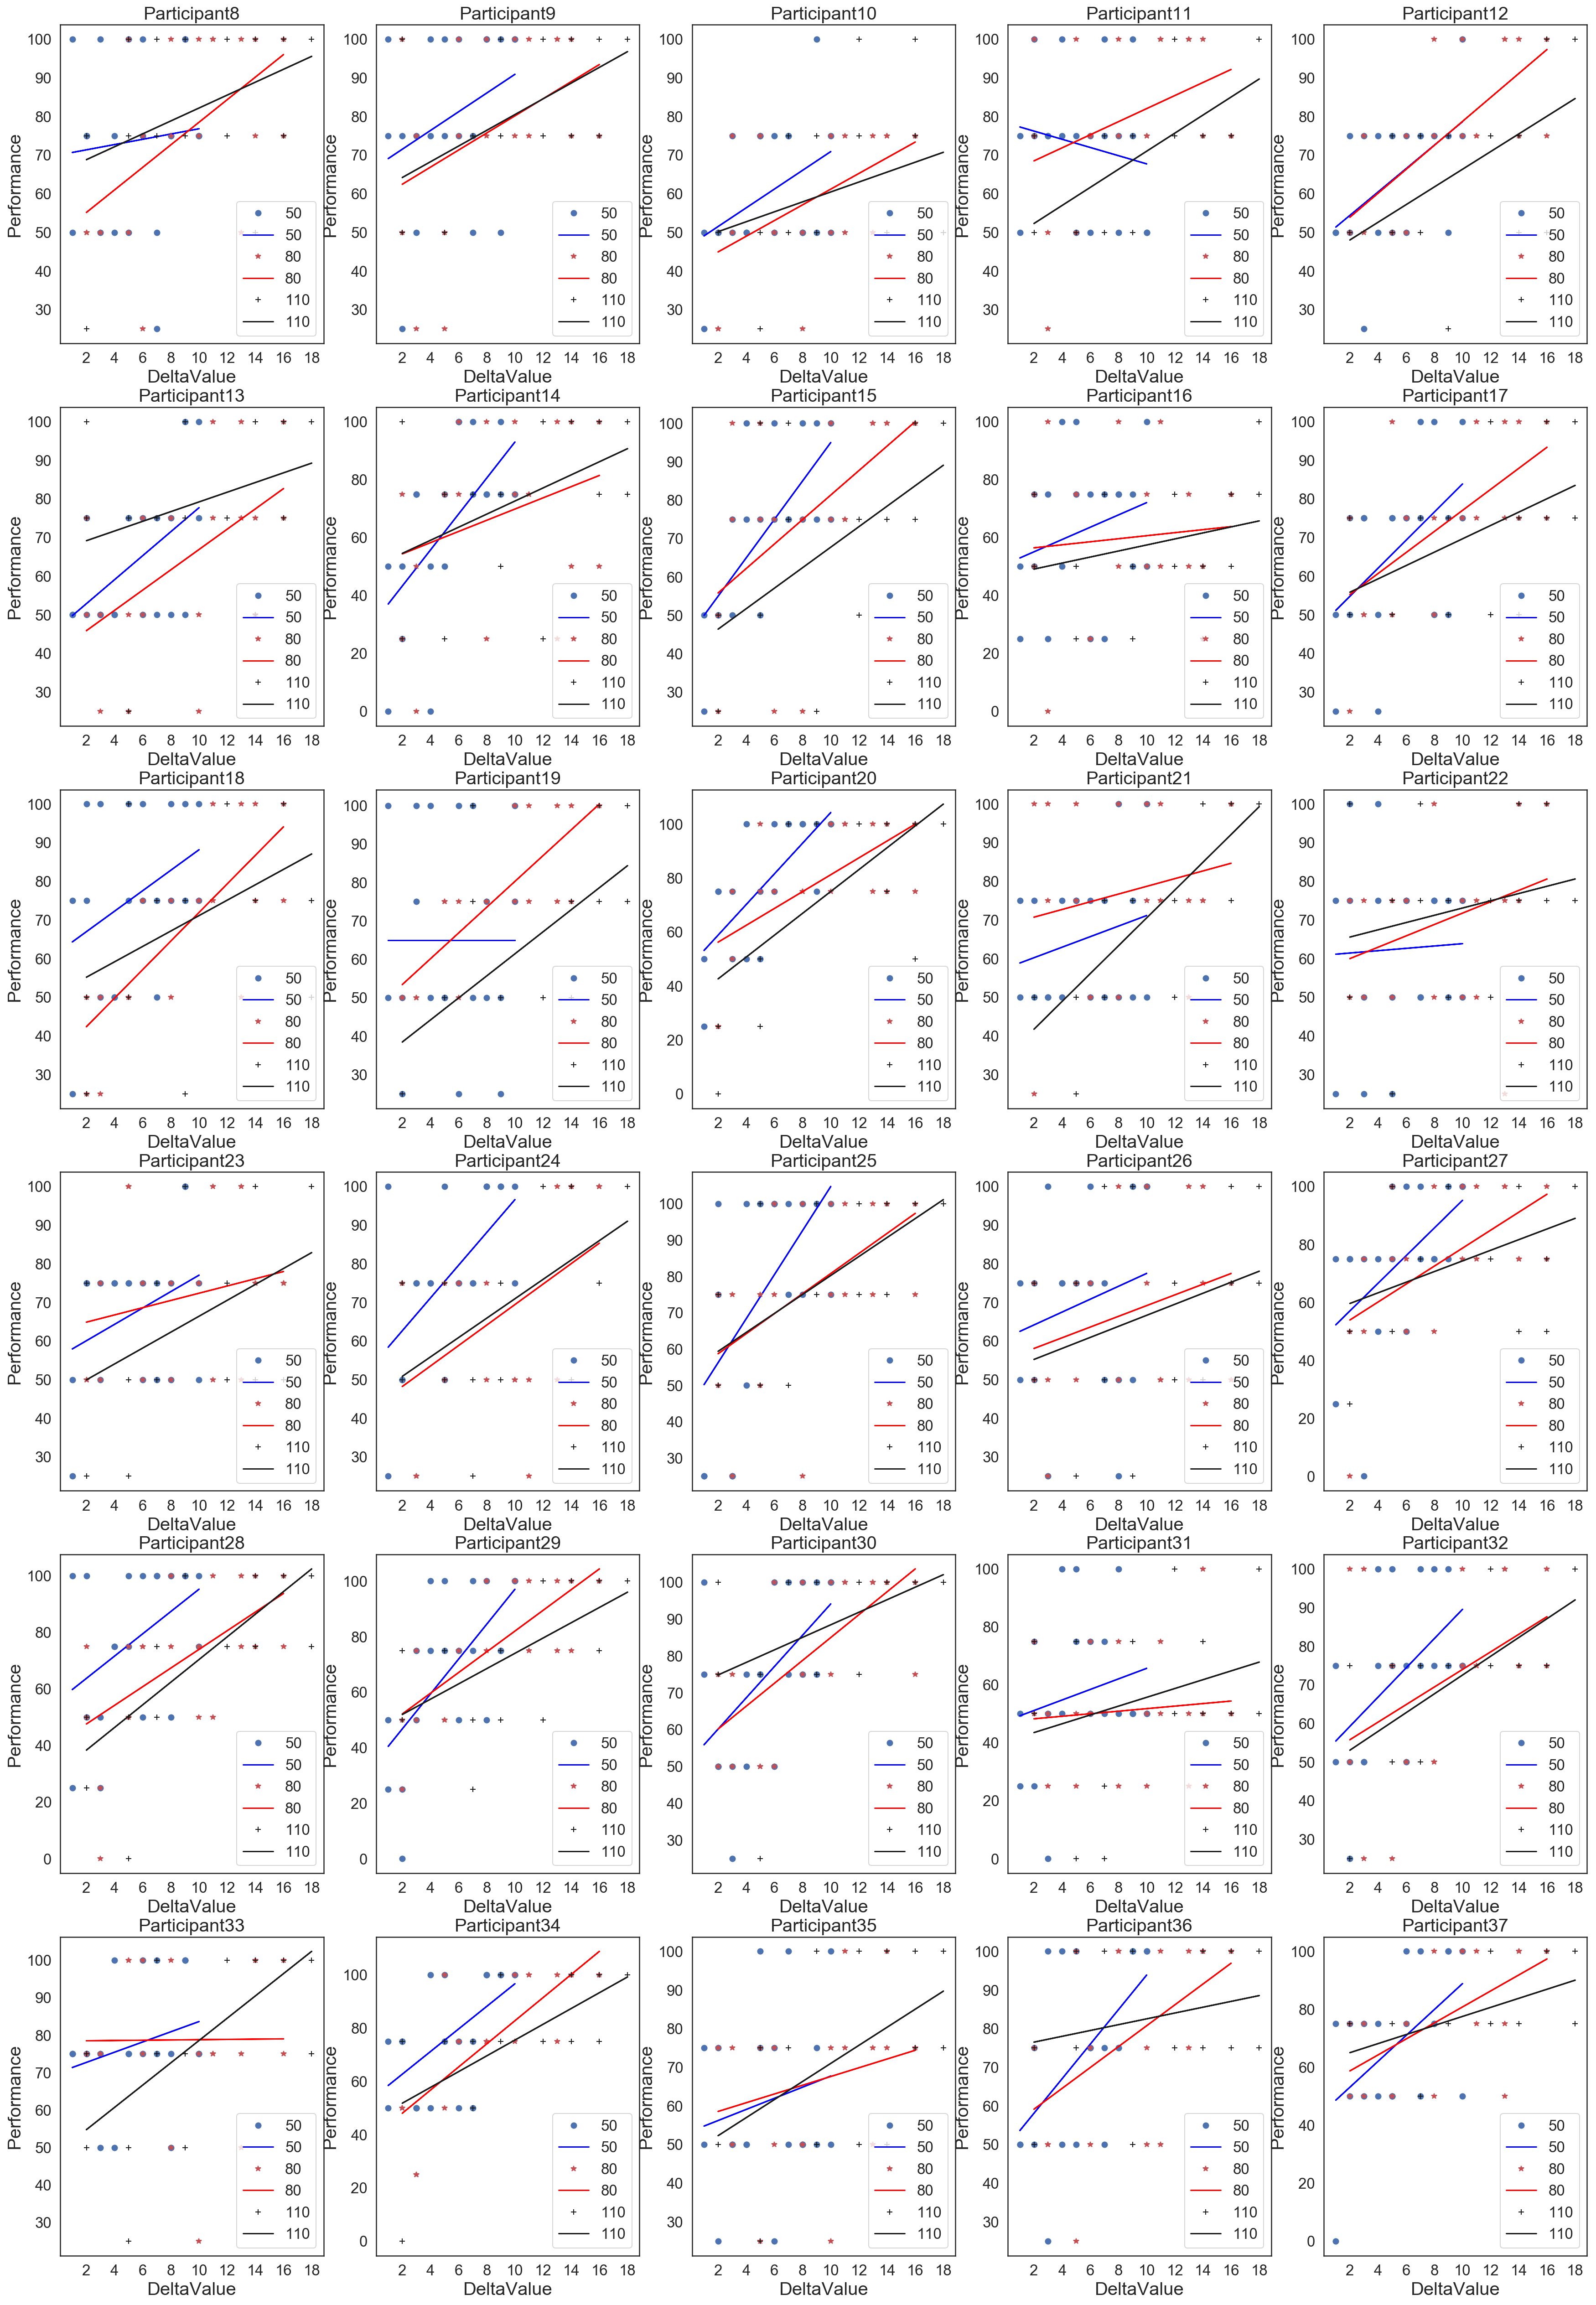

In [164]:
fig = plt.figure(figsize=(30,45))

#fig = plt.figure(figsize=(5,5))
plt.tight_layout()
for i in range(len(participant)):
    sub = {}
    sub[i] = plt.subplot(6,5,i+1)
    title("Participant"+str(i+8),fontsize=20)
    xlabel('DeltaValue', fontsize=20)
    ylabel('Performance',fontsize=20)
    xticks(np.arange(0, 22, step=2))

    #separate by base
    LowC = BaseCorrClean.loc[(BaseCorrClean['base'] == 50.0) & (BaseCorrClean['participant']==i)]
    MedC = BaseCorrClean.loc[(BaseCorrClean['base'] == 80.0) & (BaseCorrClean['participant']==i)]
    HiC = BaseCorrClean.loc[(BaseCorrClean['base'] == 110.0) & (BaseCorrClean['participant']==i)]

    #get polyfits
    xLowC = abs(pd.to_numeric(LowC['DeltaValue']))
    yLowC = pd.to_numeric(LowC['Performance'])
    fitLowC = np.polyfit(xLowC,yLowC,1)
    fit_fnLowC = np.poly1d(fitLowC)

    xMedC = abs(pd.to_numeric(MedC['DeltaValue']))
    yMedC = pd.to_numeric(MedC['Performance'])
    fitMedC = np.polyfit(xMedC,yMedC,1)
    fit_fnMedC = np.poly1d(fitMedC) 

    xHiC = abs(pd.to_numeric(HiC['DeltaValue']))
    yHiC = pd.to_numeric(HiC['Performance'])
    fitHiC = np.polyfit(xHiC,yHiC,1)
    fit_fnHiC = np.poly1d(fitHiC)
    
    # fit_fn is now a function which takes in x and returns an estimate for y
    plt.plot(xLowC,yLowC,'bo', xLowC, fit_fnLowC(xLowC), 'blue',label='50') #, markersize=3
    plt.plot(xMedC,yMedC, 'r*', xMedC, fit_fnMedC(xMedC), 'red',label='80') #,markerfacecolor='red'
    plt.plot(xHiC,yHiC, 'k+', xHiC, fit_fnHiC(xHiC),'k',label='110') #,markerfacecolor='purple'
    plt.legend()
    #plt.legend((line45, line80, line115), ('45','80','115')) #addlegend

In [165]:
stairperfcol = ['Correct', 'Incorrect', 'Performance','More','Fewer']
stairperfind = participant
Participant_perf = pd.DataFrame(columns = stairperfcol)
i=0
for i in range(len(participant)):    
    
    CorrectA =Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== 1) & (Results_Stripped['trial_type']== 'Experiment')]
    InCorrectA=Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== -1) & (Results_Stripped['trial_type']== 'Experiment')]
    CorrectMA =Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== 1) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'MORE')]
    InCorrectMA =Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== -1) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'MORE')]
    CorrectFA =Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== 1) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'LESS')]
    InCorrectFA =Results_Stripped.loc[(Results_Stripped['Session_Name_']==participant[i]) & (Results_Stripped['CORRECT']== -1) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['moreorless']== 'LESS')]
    
    

    Participant_perf.loc[i,['Correct']] = len(CorrectA)
    Participant_perf.loc[i,['Incorrect']] = len(InCorrectA)
    Participant_perf.loc[i,['Performance']] = round(len(CorrectA)/( len(InCorrectA)+len(CorrectA ))*100)
    Participant_perf.loc[i,['More']] = round(len(CorrectMA)/( len(InCorrectMA)+len(CorrectMA ))*100)
    Participant_perf.loc[i,['Fewer']] = round(len(CorrectFA)/( len(InCorrectFA)+len(CorrectFA ))*100)

print(Participant_perf)
print(mean(Participant_perf['Performance']))
#plt.hist(Correct_AnswersP1, normed=True, bins=30)

    Correct  Incorrect  Performance  More  Fewer
0     186.0       54.0         78.0  80.0   74.0
1     193.0       47.0         80.0  79.0   81.0
2     145.0       95.0         60.0  63.0   56.0
3     183.0       57.0         76.0  78.0   75.0
4     169.0       71.0         70.0  74.0   67.0
5     166.0       74.0         69.0  68.0   69.0
6     167.0       73.0         70.0  76.0   62.0
7     180.0       60.0         75.0  77.0   72.0
8     149.0       91.0         62.0  68.0   55.0
9     173.0       67.0         72.0  72.0   71.0
10    173.0       67.0         72.0  71.0   74.0
11    165.0       75.0         69.0  69.0   68.0
12    190.0       50.0         79.0  78.0   79.0
13    176.0       64.0         73.0  70.0   76.0
14    168.0       72.0         70.0  75.0   65.0
15    167.0       73.0         70.0  72.0   66.0
16    176.0       64.0         73.0  72.0   76.0
17    192.0       48.0         80.0  84.0   75.0
18    165.0       75.0         69.0  72.0   64.0
19    182.0       58

      base  Correct  Incorrect  Performance
50    50.0   1685.0      715.0         70.0
80    80.0   1731.0      669.0         72.0
110  110.0   1830.0      570.0         76.0
72.66666666666667


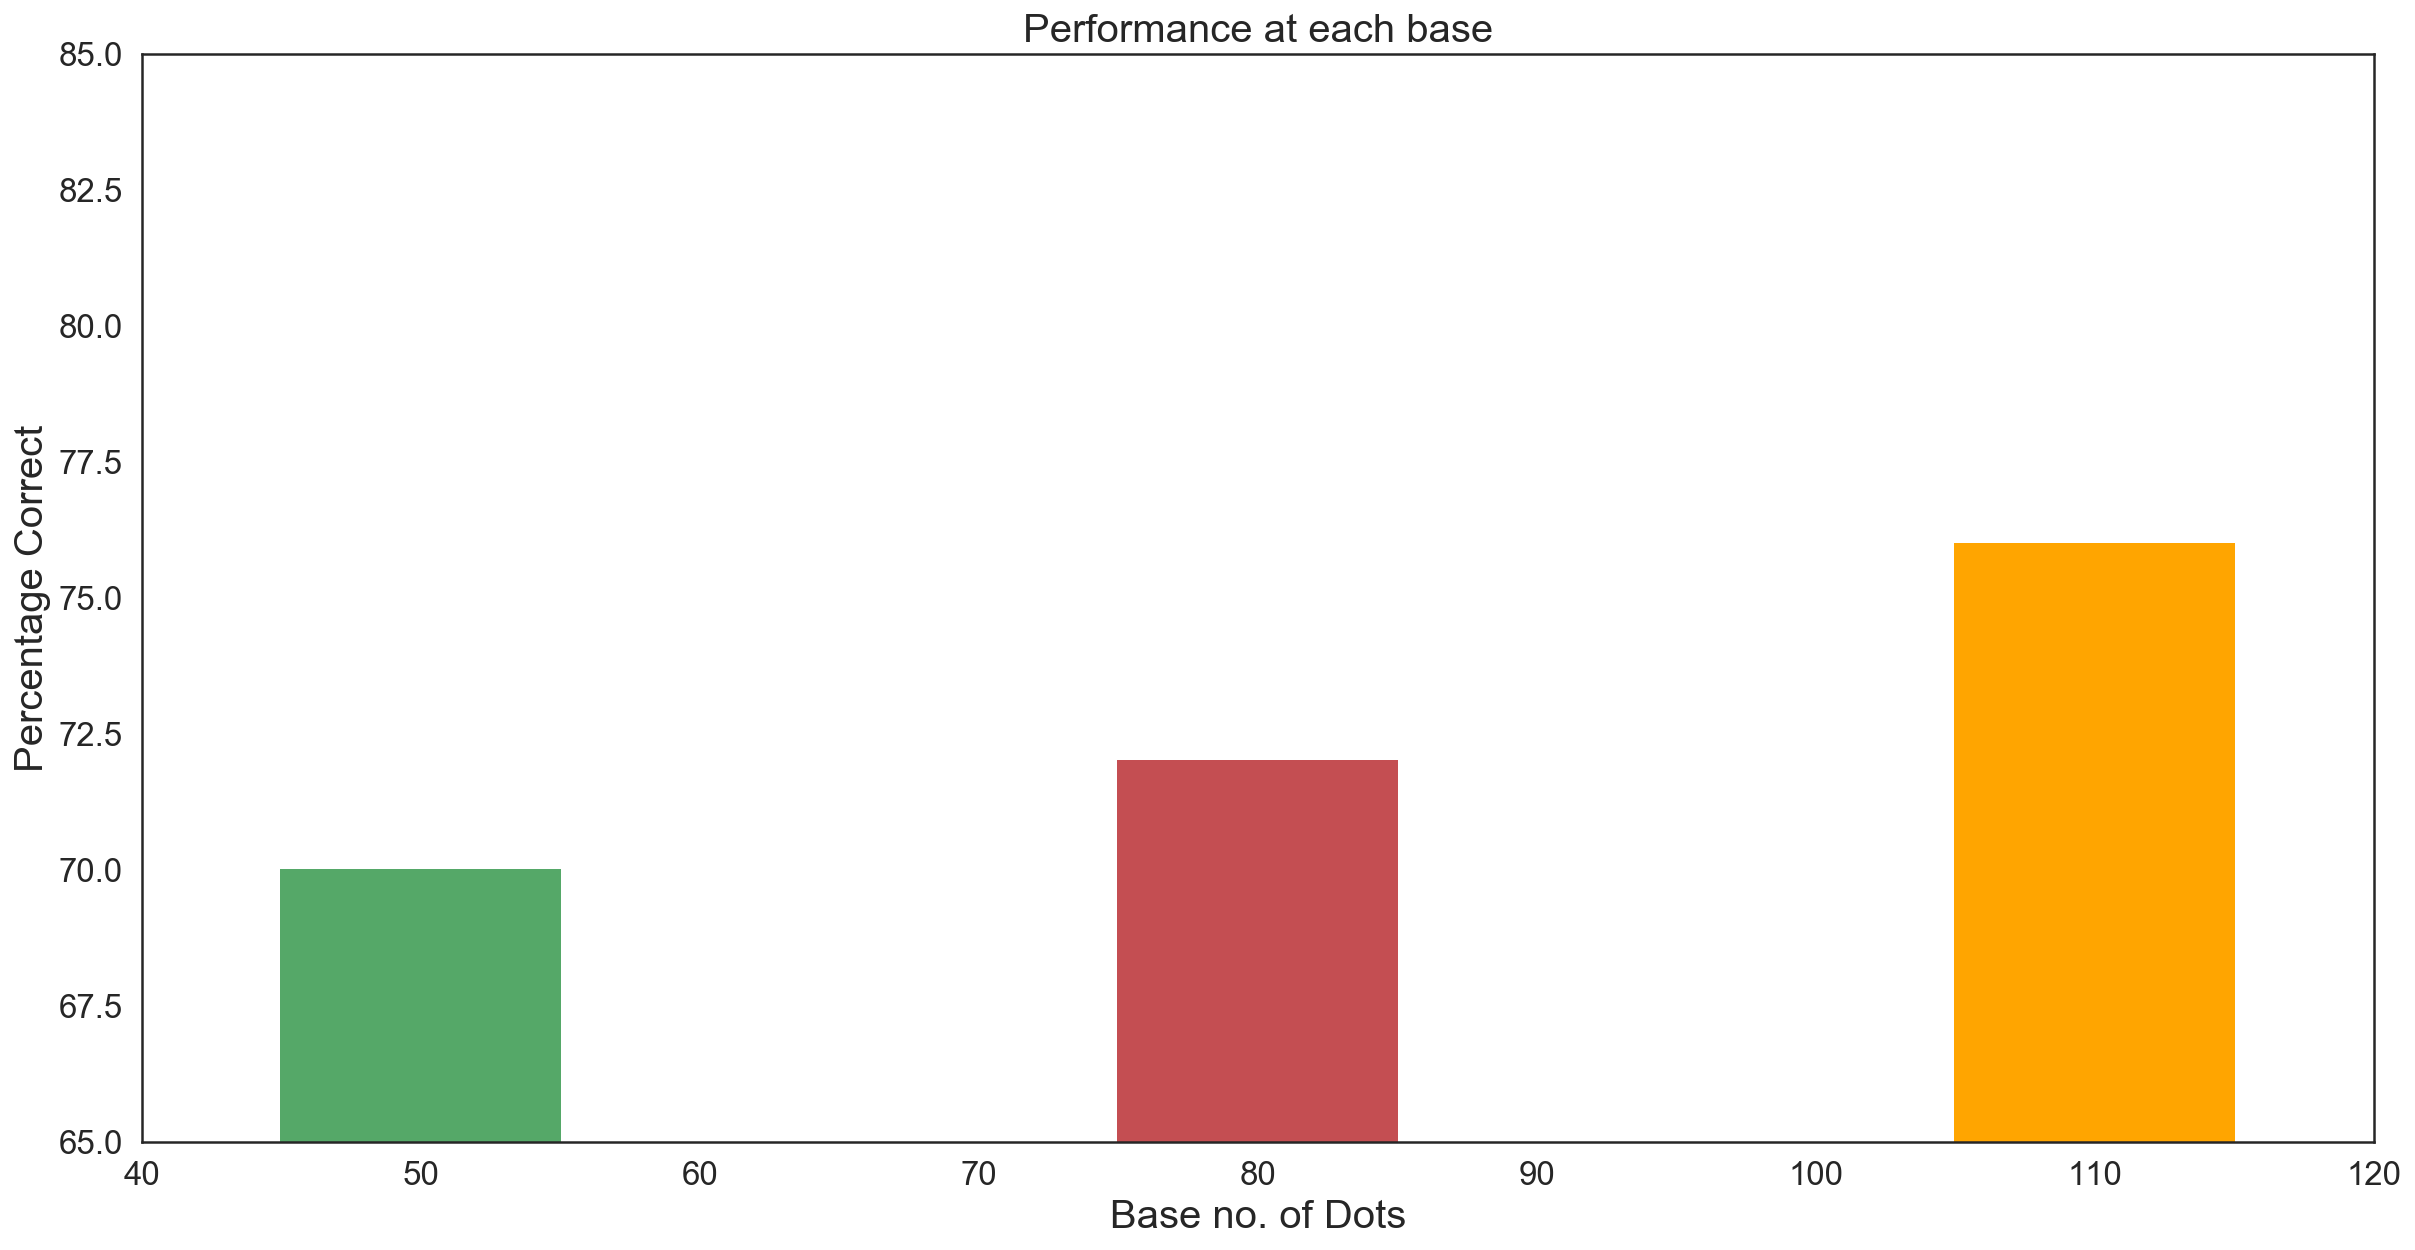

In [169]:
perfcol = ['base','Correct', 'Incorrect', 'Performance']
perfind = participant
Participant_perf = pd.DataFrame(columns = perfcol)
i=0
for i in range(50,140,30):    
    
    CorrectA =Results_Stripped.loc[(Results_Stripped['base']==i) & (Results_Stripped['CORRECT']== 1) & (Results_Stripped['trial_type']== 'Experiment')]
    IncorrectA=Results_Stripped.loc[(Results_Stripped['base']==i) & (Results_Stripped['CORRECT']== -1) & (Results_Stripped['trial_type']== 'Experiment')]
    
    Participant_perf.loc[i,['base']] = i
    Participant_perf.loc[i,['Correct']] = len(CorrectA)
    Participant_perf.loc[i,['Incorrect']] = len(IncorrectA)
    Participant_perf.loc[i,['Performance']] = round(len(CorrectA)/( len(IncorrectA)+len(CorrectA ))*100)

print(Participant_perf)
print(mean(Participant_perf['Performance']))
#plt.hist(Correct_AnswersP1, normed=True, bins=30)
figsize = (5,5)
axes = plt.gca()

axes.set_title('Performance at each base', fontsize=20)
axes.set_xlabel('Base no. of Dots', fontsize=20)
axes.set_ylabel('Percentage Correct', fontsize=20)

axes.set_ylim([65,85])
axes.set_xlim([40,120])
x = Participant_perf['base']
height = Participant_perf['Performance']
bars = plt.bar(x, height, width=10, align='center',color='blue')
bars[0].set_color('g')
bars[1].set_color('r')
bars[2].set_color('orange')



#Show the imbalanced ones?

In [221]:
a = BaseCorrClean.loc[BaseCorrClean['base']==50]
a = a['Performance']
b = BaseCorrClean.loc[BaseCorrClean['base']==80]
b = b['Performance']
c = BaseCorrClean.loc[BaseCorrClean['base']==110]
c = c['Performance']

print(np.average(pd.to_numeric(a)))
print(np.std(pd.to_numeric(a)))
print(np.average(pd.to_numeric(b)))
print(np.std(pd.to_numeric(b)))
print(np.average(pd.to_numeric(c)))
print(np.std(pd.to_numeric(c)))

a = pd.to_numeric(a)
b = pd.to_numeric(b)
c = pd.to_numeric(c)

scipy.stats.ttest_ind(c, a)

70.20833333333333
23.20556536456046
72.125
23.60845981846338
76.25
23.81569860407206


Ttest_indResult(statistic=4.446868764163373, pvalue=9.521774055457666e-06)

In [195]:
columns = ['DeltaValue', 'Percentage Delta Value', 'Correct', 'Incorrect', 'Percentage Correct','Total']
index = range(-20, 22, 1)
VarCorr = pd.DataFrame(index = index, columns = columns)
for i in range(-20, 22, 1):
        if i == 0:
            continue
        Var = Results_Stripped.loc[(Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        VarIn = Results_Stripped.loc[(Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
        #Var = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        #VarIn = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
        if len(Var) and len(VarIn) != 0:
            
            VarCorr.loc[i,['DeltaValue']] = i
            VarCorr.loc[i,['Correct']] = len(Var)
            VarCorr.loc[i,['Incorrect']] = len(VarIn)
            VarCorr.loc[i,['Percentage Correct']] = round((len(Var)/(len(Var) + len(VarIn)))*100)
            VarCorr.loc[i,['Total']] = len(VarIn) + len(Var)
        
VarCorr = VarCorr.drop([0], axis=0) # remove TRIAL_INDEX redundant columns
#VarCorr
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
#ax = VarCorr.plot.bar(x='variance', y='Percentage Correct', rot=1)

<BarContainer object of 41 artists>

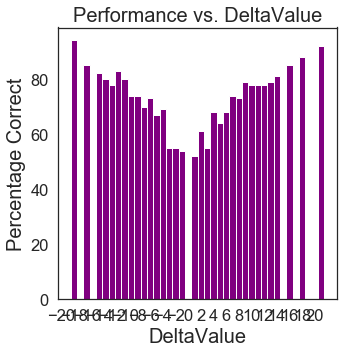

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()
#plt.axes()
ax = fig.add_subplot(111)
ax.set_title('Performance vs. DeltaValue',fontsize=20)

ax.set_xlabel('DeltaValue',fontsize=20)
ax.set_ylabel('Percentage Correct',fontsize=20)
ax.set_xticks(np.arange(-20,22,step=2))
x = VarCorr['DeltaValue']
height = VarCorr['Percentage Correct']

plt.bar(x,height, width=1.0, align='center', color='purple')

#fit = np.polyfit(x,height,3)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#plt.plot(x,height, 'o', x, fit_fn(x), 'r')

In [64]:
columnsComp = ['Base', 'DeltaValue', 'PercDelta', 'Correct', 'Incorrect', 'Percentage Correct']
#indexComp = range(1, 30, 1)
VarCorrComp = pd.DataFrame(columns = columnsComp)
Counter = 0
for j in range(50,140,30):
    for i in range(1, 30, 1):
        Var = Results_Stripped.loc[(abs(Results_Stripped['variance'])==i) & (Results_Stripped['base']==j) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        VarIn = Results_Stripped.loc[(abs(Results_Stripped['variance'])==i) & (Results_Stripped['base']==j) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
        #Var = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        #VarIn = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
        VarCorrComp.loc[Counter,['Base']] = j
        VarCorrComp.loc[Counter,['DeltaValue']] = i
        VarCorrComp.loc[Counter,['PercDelta']] = (i/j)*100
        VarCorrComp.loc[Counter,['Correct']] = len(Var)
        VarCorrComp.loc[Counter,['Incorrect']] = len(VarIn)
        
        #for j in len
        #VarCorrComp.loc[i,['PercDelta']] = i/(Results_Stripped.loc[i, ['base']])
        
        if len(VarIn) > 0 or len(Var) >0: 
            VarCorrComp.loc[Counter,['Percentage Correct']] = round((len(Var)/(len(Var) + len(VarIn)))*100)
        Counter += 1
        
#VarCorr = VarCorr.drop([0], axis=0) # remove TRIAL_INDEX redundant columns
VarCorrComp

Base DeltaValue PercDelta Correct Incorrect Percentage Correct
0    50          1         2     127       113                 53
1    50          2         4     148        92                 62
2    50          3         6     137       103                 57
3    50          4         8     165        75                 69
4    50          5        10     180        60                 75
5    50          6        12     177        63                 74
6    50          7        14     177        63                 74
7    50          8        16     181        59                 75
8    50          9        18     195        45                 81
9    50         10        20     198        42                 82
10   50         11        22       0         0                NaN
11   50         12        24       0         0                NaN
12   50         13        26       0         0                NaN
13   50         14        28       0         0                NaN
14   50         15        30       0         0                NaN
15   50         16        32       0         0                NaN
16   50         17        34       0         0                NaN
17   50         18        36       0         0                NaN
18   50         19        38       0         0                NaN
19   50         20        40       0         0                NaN
20   50         21        42       0         0                NaN
21   50         22        44       0         0                NaN
22   50         23        46       0         0                NaN
23   50         24        48       0         0                NaN
24   50         25        50       0         0                NaN
25   50         26        52       0         0                NaN
26   50         27        54       0         0                NaN
27   50         28        56       0         0                NaN
28   50         29        58       0         0                NaN
29   80          1      1.25       0         0                NaN
..  ...        ...       ...     ...       ...                ...
57   80         29     36.25       0         0                NaN
58  110          1  0.909091       0         0                NaN
59  110          2   1.81818     133       107                 55
60  110          3   2.72727       0         0                NaN
61  110          4   3.63636       0         0                NaN
62  110          5   4.54545     134       106                 56
63  110          6   5.45455       0         0                NaN
64  110          7   6.36364     168        72                 70
65  110          8   7.27273       0         0                NaN
66  110          9   8.18182     172        68                 72
67  110         10   9.09091       0         0                NaN
68  110         11        10       0         0                NaN
69  110         12   10.9091     187        53                 78
70  110         13   11.8182       0         0                NaN
71  110         14   12.7273     186        54                 78
72  110         15   13.6364       0         0                NaN
73  110         16   14.5455     201        39                 84
74  110         17   15.4545       0         0                NaN
75  110         18   16.3636     219        21                 91
76  110         19   17.2727       0         0                NaN
77  110         20   18.1818       0         0                NaN
78  110         21   19.0909     212        28                 88
79  110         22        20       0         0                NaN
80  110         23   20.9091     218        22                 91
81  110         24   21.8182       0         0                NaN
82  110         25   22.7273       0         0                NaN
83  110         26   23.6364       0         0                NaN
84  110         27   24.5455       0         0                NaN
85  110         28   25.4545       0       

In [65]:
#Performance = VarCorrComp['Percentage Correct']
#UsableData = np.isfinite(pd.to_numeric(Performance))
Validate = VarCorrComp['Correct'] > 0
UsableData = Validate
VarCorrComp = VarCorrComp[UsableData]
#pd.DataFrame(BaseCorrClean)

VarCorrComp

Base DeltaValue PercDelta Correct Incorrect Percentage Correct
0    50          1         2     127       113                 53
1    50          2         4     148        92                 62
2    50          3         6     137       103                 57
3    50          4         8     165        75                 69
4    50          5        10     180        60                 75
5    50          6        12     177        63                 74
6    50          7        14     177        63                 74
7    50          8        16     181        59                 75
8    50          9        18     195        45                 81
9    50         10        20     198        42                 82
30   80          2       2.5     136       104                 57
31   80          3      3.75     125       115                 52
33   80          5      6.25     159        81                 66
34   80          6       7.5     162        78                 68
36   80          8        10     172        68                 72
38   80         10      12.5     181        59                 75
39   80         11     13.75     193        47                 80
41   80         13     16.25     191        49                 80
42   80         14      17.5     205        35                 85
44   80         16        20     207        33                 86
59  110          2   1.81818     133       107                 55
62  110          5   4.54545     134       106                 56
64  110          7   6.36364     168        72                 70
66  110          9   8.18182     172        68                 72
69  110         12   10.9091     187        53                 78
71  110         14   12.7273     186        54                 78
73  110         16   14.5455     201        39                 84
75  110         18   16.3636     219        21                 91
78  110         21   19.0909     212        28                 88
80  110         23   20.9091     218        22                 91

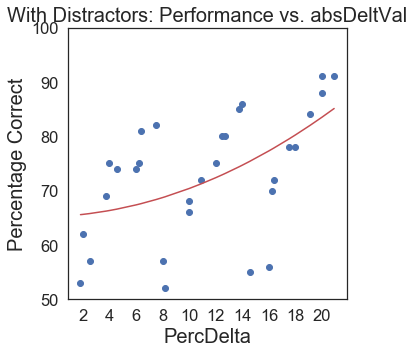

In [66]:
fig = plt.figure()
#plt.axes()
ax = fig.add_subplot(111)
ax.set_title('With Distractors: Performance vs. absDeltVal',fontsize=20)

ax.set_xlabel('PercDelta', fontsize=20)
ax.set_ylabel('Percentage Correct',fontsize=20)
ax.set_xticks(np.arange(0,24,step=2))
ax.set_ylim([50,100])
x = sort(pd.to_numeric(VarCorrComp['PercDelta']))
height = pd.to_numeric(VarCorrComp['Percentage Correct'])
#plt.bar(x,height, width=1.4, align='center', color='purple')
#plt.plot(x, height, color = 'red')
fit = np.polyfit(x,height,2)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,height, 'o', x, fit_fn(x), 'r')

In [67]:
columnsDifBas = ['base','DeltaValue','Correct', 'Incorrect','PercentageDV', 'PercentageCorrect','PropCorrect']
indexDifBas = range(2, 22, 2)
DifBase = pd.DataFrame(index = indexDifBas, columns = columnsDifBas)
counter = 0
for j in range(50,140,30):
    for i in range(0, 24, 1):
        
        Correct1 = Results_Stripped.loc[((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) &(abs(Results_Stripped['variance'])==i) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== 1)]  
        Incorrect1 = Results_Stripped.loc[((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) & (abs(Results_Stripped['variance'])==i) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== -1)]
        
        
        #Var = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        #VarIn = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
        DifBase.loc[counter,['DeltaValue']] = i
        DifBase.loc[counter,['base']] = j
        DifBase.loc[counter,['Correct']] = len(Correct1)
        DifBase.loc[counter,['Incorrect']] = len(Incorrect1)
        #DifBase.loc[counter,['PercentageCorrect']] = round((len(Correct1)/(len(Incorrect1) + len(Correct1)))*100)
        #DifBase.loc[counter,['PropCorrect']] = round((len(Correct1)/(len(Incorrect1) + len(Correct1))),2)
        DifBase.loc[counter,['PercentageDV']] = round((i/j)*100)
        if len(Correct1)>0:
            DifBase.loc[counter,['PercentageCorrect']] = round((len(Correct1)/(len(Incorrect1) + len(Correct1)))*100)
            DifBase.loc[counter,['PropCorrect']] = round((len(Correct1)/(len(Incorrect1) + len(Correct1))),2)
        counter += 1
        
#VarCorr = VarCorr.drop([0], axis=0) # remove TRIAL_INDEX redundant columns
DifBase = DifBase.sort_values(['base', 'DeltaValue'], ascending=[True, True])
#DifBase

In [68]:
Performance = DifBase['PercentageCorrect']
UsableData = np.isfinite(pd.to_numeric(Performance))
#Validate = VarCorrComp['Correct'] > 0
#UsableData = Validate
DifBase = DifBase[UsableData]
DifBase

base DeltaValue Correct Incorrect PercentageDV PercentageCorrect  \
1    50          1     127       113            2                53   
2    50          2     148        92            4                62   
3    50          3     137       103            6                57   
4    50          4     165        75            8                69   
5    50          5     180        60           10                75   
6    50          6     177        63           12                74   
7    50          7     177        63           14                74   
8    50          8     181        59           16                75   
9    50          9     195        45           18                81   
10   50         10     198        42           20                82   
26   80          2     136       104            2                57   
27   80          3     125       115            4                52   
29   80          5     159        81            6                66   
30   80          6     162        78            8                68   
32   80          8     172        68           10                72   
34   80         10     181        59           12                75   
35   80         11     193        47           14                80   
37   80         13     191        49           16                80   
38   80         14     205        35           18                85   
40   80         16     207        33           20                86   
50  110          2     133       107            2                55   
53  110          5     134       106            5                56   
55  110          7     168        72            6                70   
57  110          9     172        68            8                72   
60  110         12     187        53           11                78   
62  110         14     186        54           13                78   
64  110         16     201        39           15                84   
66  110         18     219        21           16                91   
69  110         21     212        28           19                88   
71  110         23     218        22           21                91   

   PropCorrect  
1         0.53  
2         0.62  
3         0.57  
4         0.69  
5         0.75  
6         0.74  
7         0.74  
8         0.75  
9         0.81  
10        0.82  
26        0.57  
27        0.52  
29        0.66  
30        0.68  
32        0.72  
34        0.75  
35         0.8  
37         0.8  
38        0.85  
40        0.86  
50        0.55  
53        0.56  
55         0.7  
57        0.72  
60        0.78  
62        0.78  
64        0.84  
66        0.91  
69        0.88  
71        0.91

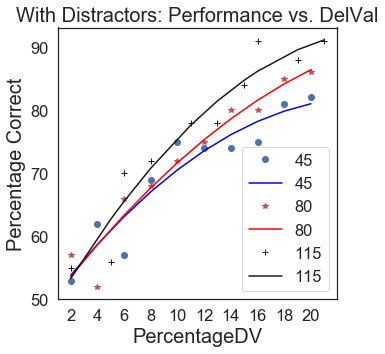

In [69]:
#plt.bar(x,height, width=1.4, align='center', color='purple') # for bars
#plt.plot(x, height, color = 'red') #to draw point to point line
#plt.axes()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_title('With Distractors: Performance vs. DelVal',fontsize=20)
ax.set_xlabel('PercentageDV',fontsize=20)
ax.set_ylabel('Percentage Correct',fontsize=20)
ax.set_xticks(np.arange(0,46,step=2))
#ax.set_ylim([50,100])
#for45
Low = DifBase.loc[(DifBase['base'] == 50.0)]
xLow = pd.to_numeric(Low['PercentageDV'])
yLow = pd.to_numeric(Low['PercentageCorrect'])
fitLow = np.polyfit(xLow,yLow,2)
fit_fnLow = np.poly1d(fitLow) 
#for80
# fit_fn is now a function which takes in x and returns an estimate for y
Med = DifBase.loc[(DifBase['base'] == 80.0)]
xMed = pd.to_numeric(Med['PercentageDV'])
yMed = pd.to_numeric(Med['PercentageCorrect'])
fitMed = np.polyfit(xMed,yMed,2)
fit_fnMed = np.poly1d(fitMed) 
#For115
Hi = DifBase.loc[(DifBase['base'] == 110.0)]
xHi = pd.to_numeric(Hi['PercentageDV'])
yHi = pd.to_numeric(Hi['PercentageCorrect'])
fitHi = np.polyfit(xHi,yHi,2)
fit_fnHi = np.poly1d(fitHi) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(xLow,yLow,'bo', xLow, fit_fnLow(xLow), 'blue',label='45') #, markersize=3
plt.plot(xMed,yMed, 'r*', xMed, fit_fnMed(xMed), 'red',label='80') #,markerfacecolor='red'
plt.plot(xHi,yHi, 'k+', xHi, fit_fnHi(xHi),'k',label='115') #,markerfacecolor='purple'
plt.legend()
#.legend([line45, line80, line115], ['line45', 'line80','line115'])
#plt.legend((line45, line80, line115), ('45','80','115')) #addlegend



In [251]:
import seaborn as sns
import pymer4
from pymer4.models import Lm
from pymer4.utils import get_resource_path

In [71]:
DifBase['PercentageCorrect'] = pd.to_numeric(DifBase['PercentageCorrect'])
DifBase['PercentageDV'] = pd.to_numeric(DifBase['PercentageDV'])
DifBase['base'] = pd.to_numeric(DifBase['base'])
DifBaseCut = DifBase.loc[DifBase['PercentageDV']<= 18]

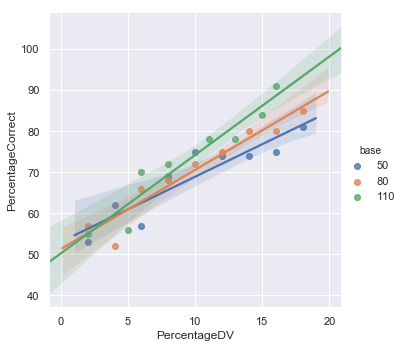

In [72]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lmplot(x="PercentageDV", y="PercentageCorrect", hue="base", data=DifBaseCut)
#sns.regplot(x= 'base', y= 'PropCorrect', data= model.data, fit_reg=True, marker = '*')

In [228]:
model = Lm('PercentageCorrect ~ PercentageDV:base + PercentageDV + base', data = DifBaseCut)
model.fit()

Formula: PercentageCorrect ~ PercentageDV:base + PercentageDV + base

Family: gaussian

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 26	 R^2: 0.898	 R^2_adj: 0.884

Log-likelihood: -68.371 	 AIC: 144.742	 BIC: 149.775

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE  DF  T-stat  P-val  Sig
Intercept            55.174  44.077   66.272  5.351  22  10.311  0.000  ***
PercentageDV:base     0.013   0.001    0.026  0.006  22   2.214  0.037    *
PercentageDV          0.902  -0.101    1.905  0.484  22   1.865  0.076    .
base                 -0.045  -0.181    0.090  0.065  22  -0.689  0.498

In [74]:
import rpy2


%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings('ignore', category=RRuntimeWarning)

In [75]:
%%R

# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages('car')
#install.packages('ggplot2')
#install.packages('broom')
#install.packages('arm')
#install.packages('ggplot2')
#install.packages('optimx')
#install.packages('multcomp')


library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(pbkrtest)
library(broom)
library(dplyr)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)

In [76]:
Columns = list(DifBase)
for i in range(len(list(DifBase))):
    DifBase[Columns[i]] = pd.to_numeric(DifBase[Columns[i]])

In [77]:
%R -i DifBase

C:\Users\nedge\New folder\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [78]:
%%R
# Separating the data for the three conditions
DifBase45 <- DifBase[which(DifBase$base=='50'),]
DifBase80 <- DifBase[which(DifBase$base=='80'),]
DifBase115 <- DifBase[which(DifBase$base=='110'),]

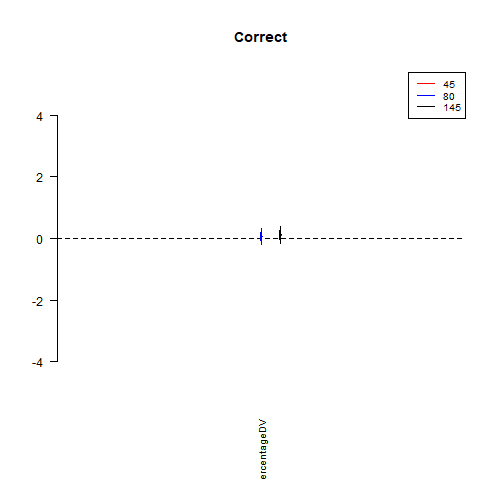

In [79]:
%%R

title_plot = 'Correct'

DifBase45_1 <- glm(PropCorrect ~ PercentageDV, data =DifBase45, family=binomial(link='logit')) #zDV + 
DifBase80_1 <- glm(PropCorrect ~ PercentageDV, data=DifBase80, family=binomial(link='logit')) #zDV + 
DifBase115_1 <- glm(PropCorrect ~ PercentageDV, data=DifBase115, family=binomial(link='logit')) #zDV + 

coefplot(DifBase45_1,intercept=FALSE,vertical = FALSE,  col.pts='blue', mar = c(3,4,5,1) ,ylim=c(-5,5) ,main=title_plot)
coefplot(DifBase80_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts='red',mar = c(3,4,5,1))
coefplot(DifBase115_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts='black',mar = c(3,4,5,1))
legend('topright',  legend=c('45', '80', '145'),col=c('red', 'blue', 'black'), lty=1:1, cex=0.8)

In [80]:
from pylab import *

columnsConf = ['base', 'DeltaValue','PercDV','Correct','Confidence Correct', 'Incorrect', 'Confidence Incorrect','Percentage Correct','Choice_RT','Conf_RT']
ConfReport = pd.DataFrame(columns = columnsConf)
counter = 0        

for j in range(50,140,30):
    for i in range(0, 24, 1):
        
        Correct1 = Results_Stripped.loc[((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) &(abs(Results_Stripped['variance'])==i) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== 1)]  
        Incorrect1 = Results_Stripped.loc[((Results_Stripped['DOTS_LEFT']==j) | (Results_Stripped['DOTS_RIGHT']== j)) & (abs(Results_Stripped['variance'])==i) & (Results_Stripped['trial_type']== 'Experiment') &
                                     (Results_Stripped['CORRECT']== -1)]
        #print(Correct1.head())
        if len(Correct1) != 0 | len(Incorrect1) != 0:
            ConfCorr = sum(Correct1['CONF'])/(len(Incorrect1['CONF']) + len(Correct1['CONF']))
            ConfInCorr = sum(Incorrect1['CONF'])/(len(Incorrect1['CONF'])+len(Incorrect1['CONF']))
        
        #Var = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== 1)]
        #VarIn = Results_Stripped.loc[((Results_Stripped['Session_Name_']=='P4')|(Results_Stripped['Session_Name_']=='P5')) & (Results_Stripped['variance']==i) & (Results_Stripped['trial_type']== 'Experiment') & (Results_Stripped['CORRECT']== -1)]
        
            ConfReport.loc[counter,['PercDV']] = (i/j)*100
            ConfReport.loc[counter,['DeltaValue']] = i
            ConfReport.loc[counter,['base']] = j
            ConfReport.loc[counter,['Confidence Correct']] = round(ConfCorr)
            ConfReport.loc[counter,['Confidence Incorrect']] = round(ConfInCorr)
            ConfReport.loc[counter,['Correct']] = len(Correct1)
            ConfReport.loc[counter,['Incorrect']] = len(Incorrect1)
            ConfReport.loc[counter,['Percentage Correct']] = round((len(Correct1)/(len(Incorrect1) + len(Correct1))*100))
            ConfReport.loc[counter,['Choice_RT']] = round(sum(Correct1['CHOICE_RT'])/len(Correct1['CHOICE_RT']))
            ConfReport.loc[counter,['Conf_RT']] = sum(Correct1['CONF_RT'])/len(Correct1['CONF_RT'])
            counter+=1
        #elif len(Correct1['CONF']) > 0:
            #ConfReport.loc[counter,['Confidence Correct']] = round(sum(Correct1['CONF'])/len(Correct1['CONF']),1)
        else:
            ConfReport.loc[counter,['DeltaValue']] = i
            ConfReport.loc[counter,['base']] = j
            ConfReport.loc[counter,['Correct']] = len(Correct1)
            #ConfReport.loc[counter,['Confidence Correct']] = None #round(sum(Correct1['CONF'])/len(Correct1['CONF']),1)
            #ConfReport.loc[counter,['Confidence Incorrect']] = None
            ConfReport.loc[counter,['Incorrect']] = len(Incorrect1)
            ConfReport.loc[counter,['Percentage Correct']] = 100
            ConfReport.loc[counter,['Choice_RT']] = round(sum(Correct1['CHOICE_RT'])/len(Correct1['CHOICE_RT']))
            ConfReport.loc[counter,['Conf_RT']] = sum(Correct1['CONF_RT'])/len(Correct1['CONF_RT'])
            counter += 1
ConfReport

C:\Users\nedge\New folder\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\nedge\New folder\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


base DeltaValue   PercDV Correct Confidence Correct Incorrect  \
0    50          0      NaN       0                NaN         0   
1    50          1        2     127                 30       113   
2    50          2        4     148                 38        92   
3    50          3        6     137                 32       103   
4    50          4        8     165                 41        75   
5    50          5       10     180                 45        60   
6    50          6       12     177                 46        63   
7    50          7       14     177                 46        63   
8    50          8       16     181                 48        59   
9    50          9       18     195                 53        45   
10   50         10       20     198                 56        42   
11   50         11      NaN       0                NaN         0   
12   50         12      NaN       0                NaN         0   
13   50         13      NaN       0                NaN         0   
14   50         14      NaN       0                NaN         0   
15   50         15      NaN       0                NaN         0   
16   50         16      NaN       0                NaN         0   
17   50         17      NaN       0                NaN         0   
18   50         18      NaN       0                NaN         0   
19   50         19      NaN       0                NaN         0   
20   50         20      NaN       0                NaN         0   
21   50         21      NaN       0                NaN         0   
22   50         22      NaN       0                NaN         0   
23   50         23      NaN       0                NaN         0   
24   80          0      NaN       0                NaN         0   
25   80          1      NaN       0                NaN         0   
26   80          2      2.5     136                 33       104   
27   80          3     3.75     125                 29       115   
28   80          4      NaN       0                NaN         0   
29   80          5     6.25     159                 43        81   
..  ...        ...      ...     ...                ...       ...   
42   80         18      NaN       0                NaN         0   
43   80         19      NaN       0                NaN         0   
44   80         20      NaN       0                NaN         0   
45   80         21      NaN       0                NaN         0   
46   80         22      NaN       0                NaN         0   
47   80         23      NaN       0                NaN         0   
48  110          0      NaN       0                NaN         0   
49  110          1      NaN       0                NaN         0   
50  110          2  1.81818     133                 30       107   
51  110          3      NaN       0                NaN         0   
52  110          4      NaN       0                NaN         0   
53  110          5  4.54545     134                 32       106   
54  110          6      NaN       0                NaN         0   
55  110          7  6.36364     168                 38        72   
56  110          8      NaN       0                NaN         0   
57  110          9  8.18182     172                 41        68   
58  110         10      NaN       0                NaN         0   
59  110         11      NaN       0                NaN         0   
60  110         12  10.9091     187                 48        53   
61  110         13      NaN       0                NaN         0   
62  110         14  12.7273     186                 47        54   
63  110         15      NaN       0                NaN         0   
64  110         16  14.5455     201                 54        39   
65  110         17      NaN       0                NaN         0   
66  110         18  16.3636     219                 58        21   
67  110         19      NaN       0                NaN         0   
68  110         20      NaN       0                NaN     

In [81]:
#Performance = VarCorrComp['Percentage Correct']
#UsableData = np.isfinite(pd.to_numeric(Performance))
Validate = ConfReport['Confidence Correct'] > 0
UsableData = Validate
ConfReport= ConfReport[UsableData]
#pd.DataFrame(BaseCorrClean)
ConfReport

base DeltaValue   PercDV Correct Confidence Correct Incorrect  \
1    50          1        2     127                 30       113   
2    50          2        4     148                 38        92   
3    50          3        6     137                 32       103   
4    50          4        8     165                 41        75   
5    50          5       10     180                 45        60   
6    50          6       12     177                 46        63   
7    50          7       14     177                 46        63   
8    50          8       16     181                 48        59   
9    50          9       18     195                 53        45   
10   50         10       20     198                 56        42   
26   80          2      2.5     136                 33       104   
27   80          3     3.75     125                 29       115   
29   80          5     6.25     159                 43        81   
30   80          6      7.5     162                 39        78   
32   80          8       10     172                 45        68   
34   80         10     12.5     181                 47        59   
35   80         11    13.75     193                 50        47   
37   80         13    16.25     191                 51        49   
38   80         14     17.5     205                 53        35   
40   80         16       20     207                 58        33   
50  110          2  1.81818     133                 30       107   
53  110          5  4.54545     134                 32       106   
55  110          7  6.36364     168                 38        72   
57  110          9  8.18182     172                 41        68   
60  110         12  10.9091     187                 48        53   
62  110         14  12.7273     186                 47        54   
64  110         16  14.5455     201                 54        39   
66  110         18  16.3636     219                 58        21   
69  110         21  19.0909     212                 58        28   
71  110         23  20.9091     218                 61        22   

   Confidence Incorrect Percentage Correct Choice_RT  Conf_RT  
1                    32                 53      3714   1649.7  
2                    28                 62      3775  1707.29  
3                    28                 57      4302  1658.55  
4                    26                 69      3780   1664.1  
5                    31                 75      3652  1734.69  
6                    28                 74      3809  1750.35  
7                    28                 74      3578  1609.53  
8                    30                 75      3473  1610.61  
9                    29                 81      3053  1575.51  
10                   30                 82      3157  1615.38  
26                   29                 57      3745  1786.12  
27                   28                 52      4644  1684.71  
29                   28                 66      3576  1573.64  
30                   30                 68      4145  1647.07  
32                   31                 72      3559  1509.61  
34                   29                 75      3372  1477.41  
35                   27                 80      3813  1622.76  
37                   28                 80      3229  1556.98  
38                   30                 85      3303  1630.75  
40                   29                 86      3348  1729.97  
50                   25                 55      5433  1655.73  
53                   28                 56      3695  1546.92  
55                   29                 70      3932  1677.12  
57                   25                 72      4200   1696.8  
60                   27                 78      3431  1677.46  
62                   27                 78      3956  1721.38  
64                   28                 84      3664  1600.22  
66                   23                 91      3866  1725.73  
69                   26               

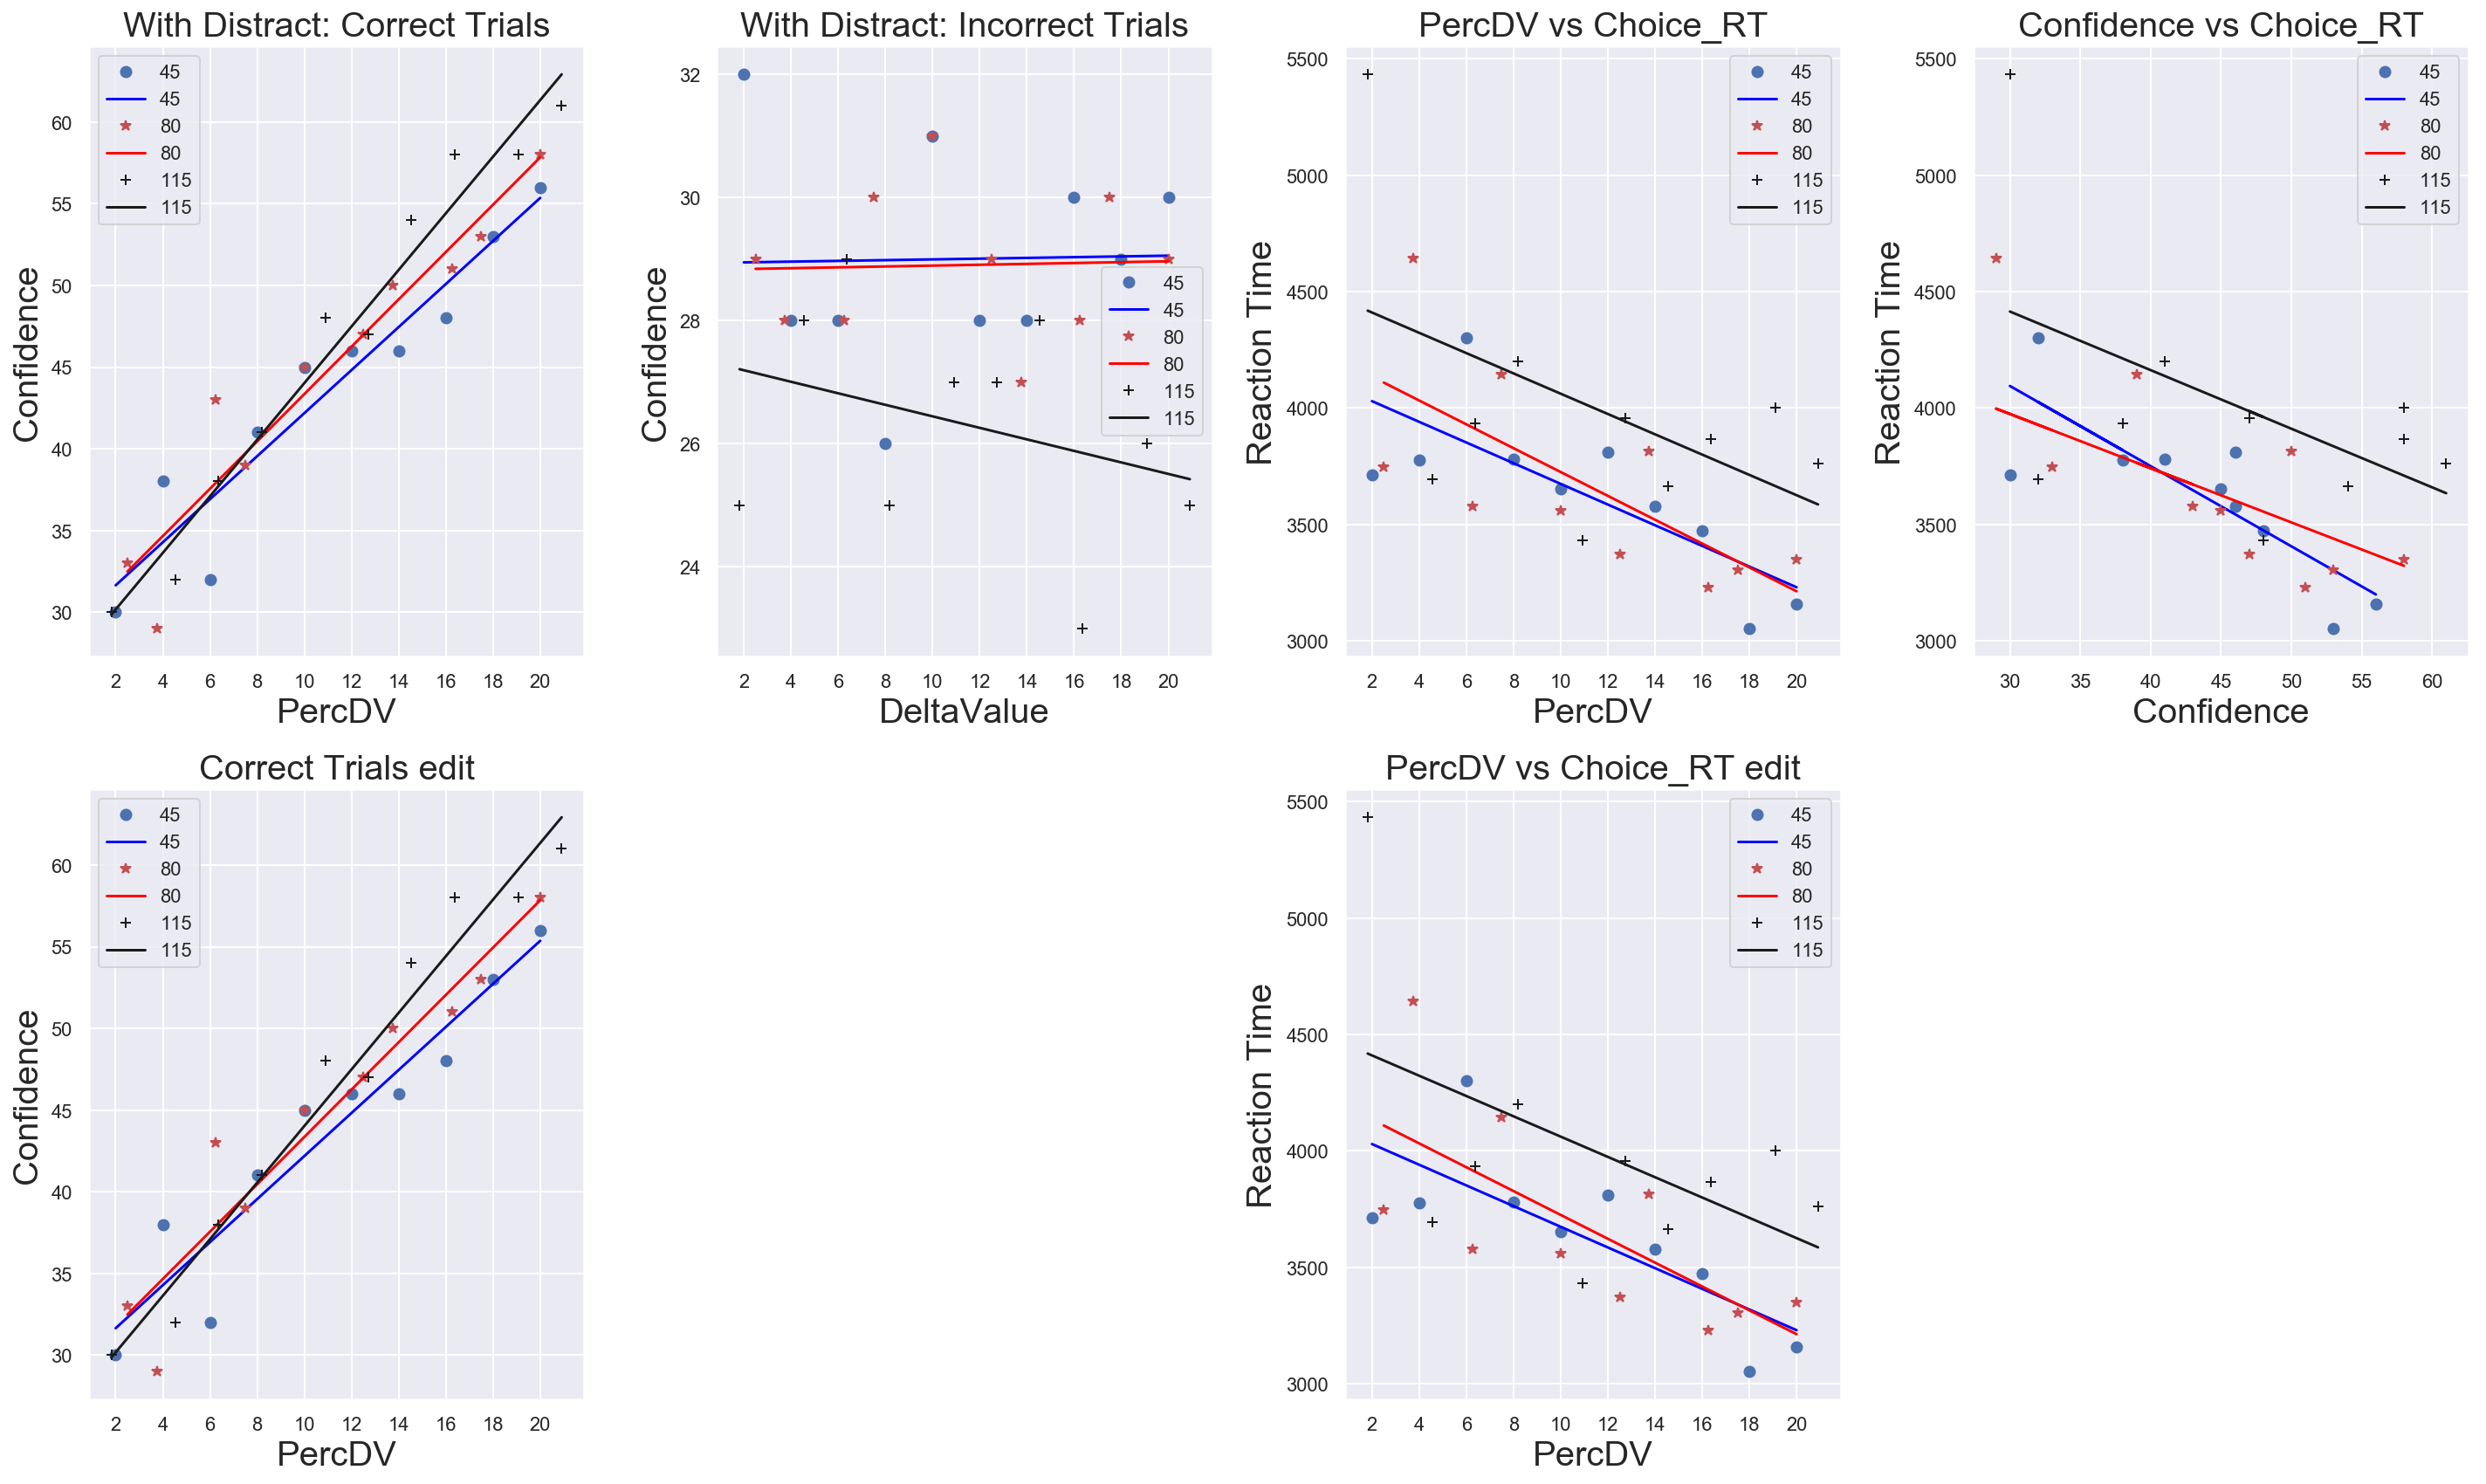

In [82]:
plt.figure(figsize=(20,12))
#fig = plt.figure(figsize=(5,5))
plt.tight_layout()
plt.subplot(2,4,1)
title('With Distract: Correct Trials',fontsize=20)
xlabel('PercDV', fontsize=20)
ylabel('Confidence',fontsize=20)
xticks(np.arange(0, 22, step=2))
#ax.set_ylim([50,100])

#separate by base
LowC = ConfReport.loc[(ConfReport['base'] == 50.0)]
MedC = ConfReport.loc[(ConfReport['base'] == 80.0)]
HiC = ConfReport.loc[(ConfReport['base'] == 110.0)]

#get polyfits
xLowC = pd.to_numeric(LowC['PercDV'])
yLowC = pd.to_numeric(LowC['Confidence Correct'])
fitLowC = np.polyfit(xLowC,yLowC,1)
fit_fnLowC = np.poly1d(fitLowC)

xMedC = pd.to_numeric(MedC['PercDV'])
yMedC = pd.to_numeric(MedC['Confidence Correct'])
fitMedC = np.polyfit(xMedC,yMedC,1)
fit_fnMedC = np.poly1d(fitMedC) 

xHiC = pd.to_numeric(HiC['PercDV'])
yHiC = pd.to_numeric(HiC['Confidence Correct'])
fitHiC = np.polyfit(xHiC,yHiC,1)
fit_fnHiC = np.poly1d(fitHiC) 

# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(xLowC,yLowC,'bo', xLowC, fit_fnLowC(xLowC), 'blue',label='45') #, markersize=3
plt.plot(xMedC,yMedC, 'r*', xMedC, fit_fnMedC(xMedC), 'red',label='80') #,markerfacecolor='red'
plt.plot(xHiC,yHiC, 'k+', xHiC, fit_fnHiC(xHiC),'k',label='115') #,markerfacecolor='purple'
plt.legend()
#plt.legend((line45, line80, line115), ('45','80','115')) #addlegend

#Incorrect vs Variance

plt.subplot(2,4,2)
plt.tight_layout()
title('With Distract: Incorrect Trials', fontsize=20)
xlabel('DeltaValue', fontsize=20)
ylabel('Confidence', fontsize=20)
xticks(np.arange(0, 22, step=2))

yLowCI = pd.to_numeric(LowC['Confidence Incorrect'])
xLowCI = pd.to_numeric(LowC['PercDV'])

yLowCIVal = np.isfinite(pd.to_numeric(yLowCI))
yLowCI = yLowCI[yLowCIVal]
xLowCI = xLowCI[yLowCIVal]
fitLowCI = np.polyfit(xLowCI,yLowCI,1)
fit_fnLowCI = np.poly1d(fitLowCI)

yMedCI = pd.to_numeric(MedC['Confidence Incorrect'])
xMedCI = pd.to_numeric(MedC['PercDV'])

yMedCIVal = np.isfinite(pd.to_numeric(yMedCI))
yMedCI = yMedCI[yMedCIVal]
xMedCI = xMedCI[yMedCIVal]
fitMedCI = np.polyfit(xMedCI,yMedCI,1)
fit_fnMedCI = np.poly1d(fitMedCI)

yHiCI = pd.to_numeric(HiC['Confidence Incorrect'])
xHiCI = pd.to_numeric(HiC['PercDV'])

yHiCIVal = np.isfinite(pd.to_numeric(yHiCI))
yHiCI = yHiCI[yHiCIVal]
xHiCI = xHiCI[yHiCIVal]
fitHiCI = np.polyfit(xHiCI,yHiCI,1)
fit_fnHiCI = np.poly1d(fitHiCI)

plt.plot(xLowCI,yLowCI,'bo', xLowCI, fit_fnLowCI(xLowCI), 'blue',label='45') #, markersize=3
plt.plot(xMedCI,yMedCI, 'r*', xMedCI, fit_fnMedCI(xMedCI), 'red',label='80') #,markerfacecolor='red'
plt.plot(xHiCI,yHiCI, 'k+', xHiCI, fit_fnHiCI(xHiCI),'k',label='115') #,markerfacecolor='purple
plt.legend()

#delta value vs. confidence

plt.subplot(2,4,3)
plt.tight_layout()
title('PercDV vs Choice_RT',fontsize=20)
xlabel('PercDV', fontsize=20)
ylabel('Reaction Time',fontsize=20)
xticks(np.arange(0, 22, step=2))
#ax.set_xlabel('DeltaValue')
#ax.set_ylabel('Choice_RT')
LowC = ConfReport.loc[(ConfReport['base'] == 50.0)]
xLowC = pd.to_numeric(LowC['PercDV'])
LoChRT = pd.to_numeric(LowC['Choice_RT'])
fitLowCh = np.polyfit(xLowC,LoChRT,1)
fit_fnLowCh = np.poly1d(fitLowCh) 
MedC = ConfReport.loc[(ConfReport['base'] == 80.0)]
xMedC = pd.to_numeric(MedC['PercDV'])
MedChRT = pd.to_numeric(MedC['Choice_RT'])
fitMedCh = np.polyfit(xMedC,MedChRT,1)
fit_fnMedCh = np.poly1d(fitMedCh) 
#For115
HiC = ConfReport.loc[(ConfReport['base'] == 110.0)]
xHiC = pd.to_numeric(HiC['PercDV'])
HiChRT = pd.to_numeric(HiC['Choice_RT'])
fitHiCh = np.polyfit(xHiC,HiChRT,1)
fit_fnHiCh = np.poly1d(fitHiCh) 

plt.plot(xLowC,LoChRT,'bo', xLowC, fit_fnLowCh(xLowC), 'blue',label='45') #, markersize=3
plt.plot(xMedC,MedChRT,'r*', xMedC, fit_fnMedCh(xMedC), 'red',label='80') #, markersize=3
plt.plot(xHiC,HiChRT,'k+', xHiC, fit_fnHiCh(xHiC), 'k',label='115') #, markersize=3
plt.legend()

#confidence vs. response time
plt.subplot(2,4,4)
plt.tight_layout()
title('Confidence vs Choice_RT',fontsize=20)
xlabel('Confidence', fontsize=20)
ylabel('Reaction Time',fontsize=20)

LowC = ConfReport.loc[(ConfReport['base'] == 50.0)]
xLowCon = pd.to_numeric(LowC['Confidence Correct'])
LoCRT = pd.to_numeric(LowC['Choice_RT'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = ConfReport.loc[(ConfReport['base'] == 80.0)]
xMedCon = pd.to_numeric(MedC['Confidence Correct'])
MedCRT = pd.to_numeric(MedC['Choice_RT'])
fitMedCRT = np.polyfit(xMedCon,LoCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = ConfReport.loc[(ConfReport['base'] ==110.0)]
xHiCon = pd.to_numeric(HiC['Confidence Correct'])
HiCRT = pd.to_numeric(HiC['Choice_RT'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3'''
plt.legend()

plt.subplot(2,4,5)
title('Correct Trials edit',fontsize=20)
xlabel('PercDV', fontsize=20)
ylabel('Confidence',fontsize=20)
xticks(np.arange(0, 22, step=2))
#ax.set_ylim([50,100])

#separate by base
LowC = ConfReport.loc[(ConfReport['base'] == 50.0)]
MedC = ConfReport.loc[(ConfReport['base'] == 80.0)]
HiC = ConfReport.loc[(ConfReport['base'] == 110.0)]

#get polyfits
xLowC = pd.to_numeric(LowC['PercDV'])
yLowC = pd.to_numeric(LowC['Confidence Correct'])
fitLowC = np.polyfit(xLowC,yLowC,1)
fit_fnLowC = np.poly1d(fitLowC)

xMedC = pd.to_numeric(MedC['PercDV'])
yMedC = pd.to_numeric(MedC['Confidence Correct'])
fitMedC = np.polyfit(xMedC,yMedC,1)
fit_fnMedC = np.poly1d(fitMedC) 

xHiC = pd.to_numeric(HiC['PercDV'])
#xHiC = xHiC.drop([20], axis=0)
yHiC = pd.to_numeric(HiC['Confidence Correct'])
#yHiC = yHiC.drop([20], axis=0)
fitHiC = np.polyfit(xHiC,yHiC,1)
fit_fnHiC = np.poly1d(fitHiC) 

# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(xLowC,yLowC,'bo', xLowC, fit_fnLowC(xLowC), 'blue',label='45') #, markersize=3
plt.plot(xMedC,yMedC, 'r*', xMedC, fit_fnMedC(xMedC), 'red',label='80') #,markerfacecolor='red'
plt.plot(xHiC,yHiC, 'k+', xHiC, fit_fnHiC(xHiC),'k',label='115') #,markerfacecolor='purple'
plt.legend()

plt.subplot(2,4,7)
plt.tight_layout()
title('PercDV vs Choice_RT edit',fontsize=20)
xlabel('PercDV', fontsize=20)
ylabel('Reaction Time',fontsize=20)
xticks(np.arange(0, 22, step=2))
#ax.set_xlabel('DeltaValue')
#ax.set_ylabel('Choice_RT')
LowC = ConfReport.loc[(ConfReport['base'] == 50.0)]
xLowC = pd.to_numeric(LowC['PercDV'])
LoChRT = pd.to_numeric(LowC['Choice_RT'])
fitLowCh = np.polyfit(xLowC,LoChRT,1)
fit_fnLowCh = np.poly1d(fitLowCh) 
MedC = ConfReport.loc[(ConfReport['base'] == 80.0)]
xMedC = pd.to_numeric(MedC['PercDV'])
MedChRT = pd.to_numeric(MedC['Choice_RT'])
fitMedCh = np.polyfit(xMedC,MedChRT,1)
fit_fnMedCh = np.poly1d(fitMedCh) 
#For115
HiC = ConfReport.loc[(ConfReport['base'] == 110.0)]
xHiC = pd.to_numeric(HiC['PercDV'])
#xHiC = xHiC.drop([20],axis=0)
HiChRT = pd.to_numeric(HiC['Choice_RT'])
#HiChRT = HiChRT.drop([20],axis=0)
fitHiCh = np.polyfit(xHiC,HiChRT,1)
fit_fnHiCh = np.poly1d(fitHiCh) 

plt.plot(xLowC,LoChRT,'bo', xLowC, fit_fnLowCh(xLowC), 'blue',label='45') #, markersize=3
plt.plot(xMedC,MedChRT,'r*', xMedC, fit_fnMedCh(xMedC), 'red',label='80') #, markersize=3
plt.plot(xHiC,HiChRT,'k+', xHiC, fit_fnHiCh(xHiC), 'k',label='115') #, markersize=3
plt.legend()

In [83]:
x = abs(Results_Stripped['variance'])/abs(Results_Stripped['base'])*100
x = pd.DataFrame(x,columns = ["PercDif"])
Results_StrippedPD = pd.concat([Results_Stripped, x], axis=1)

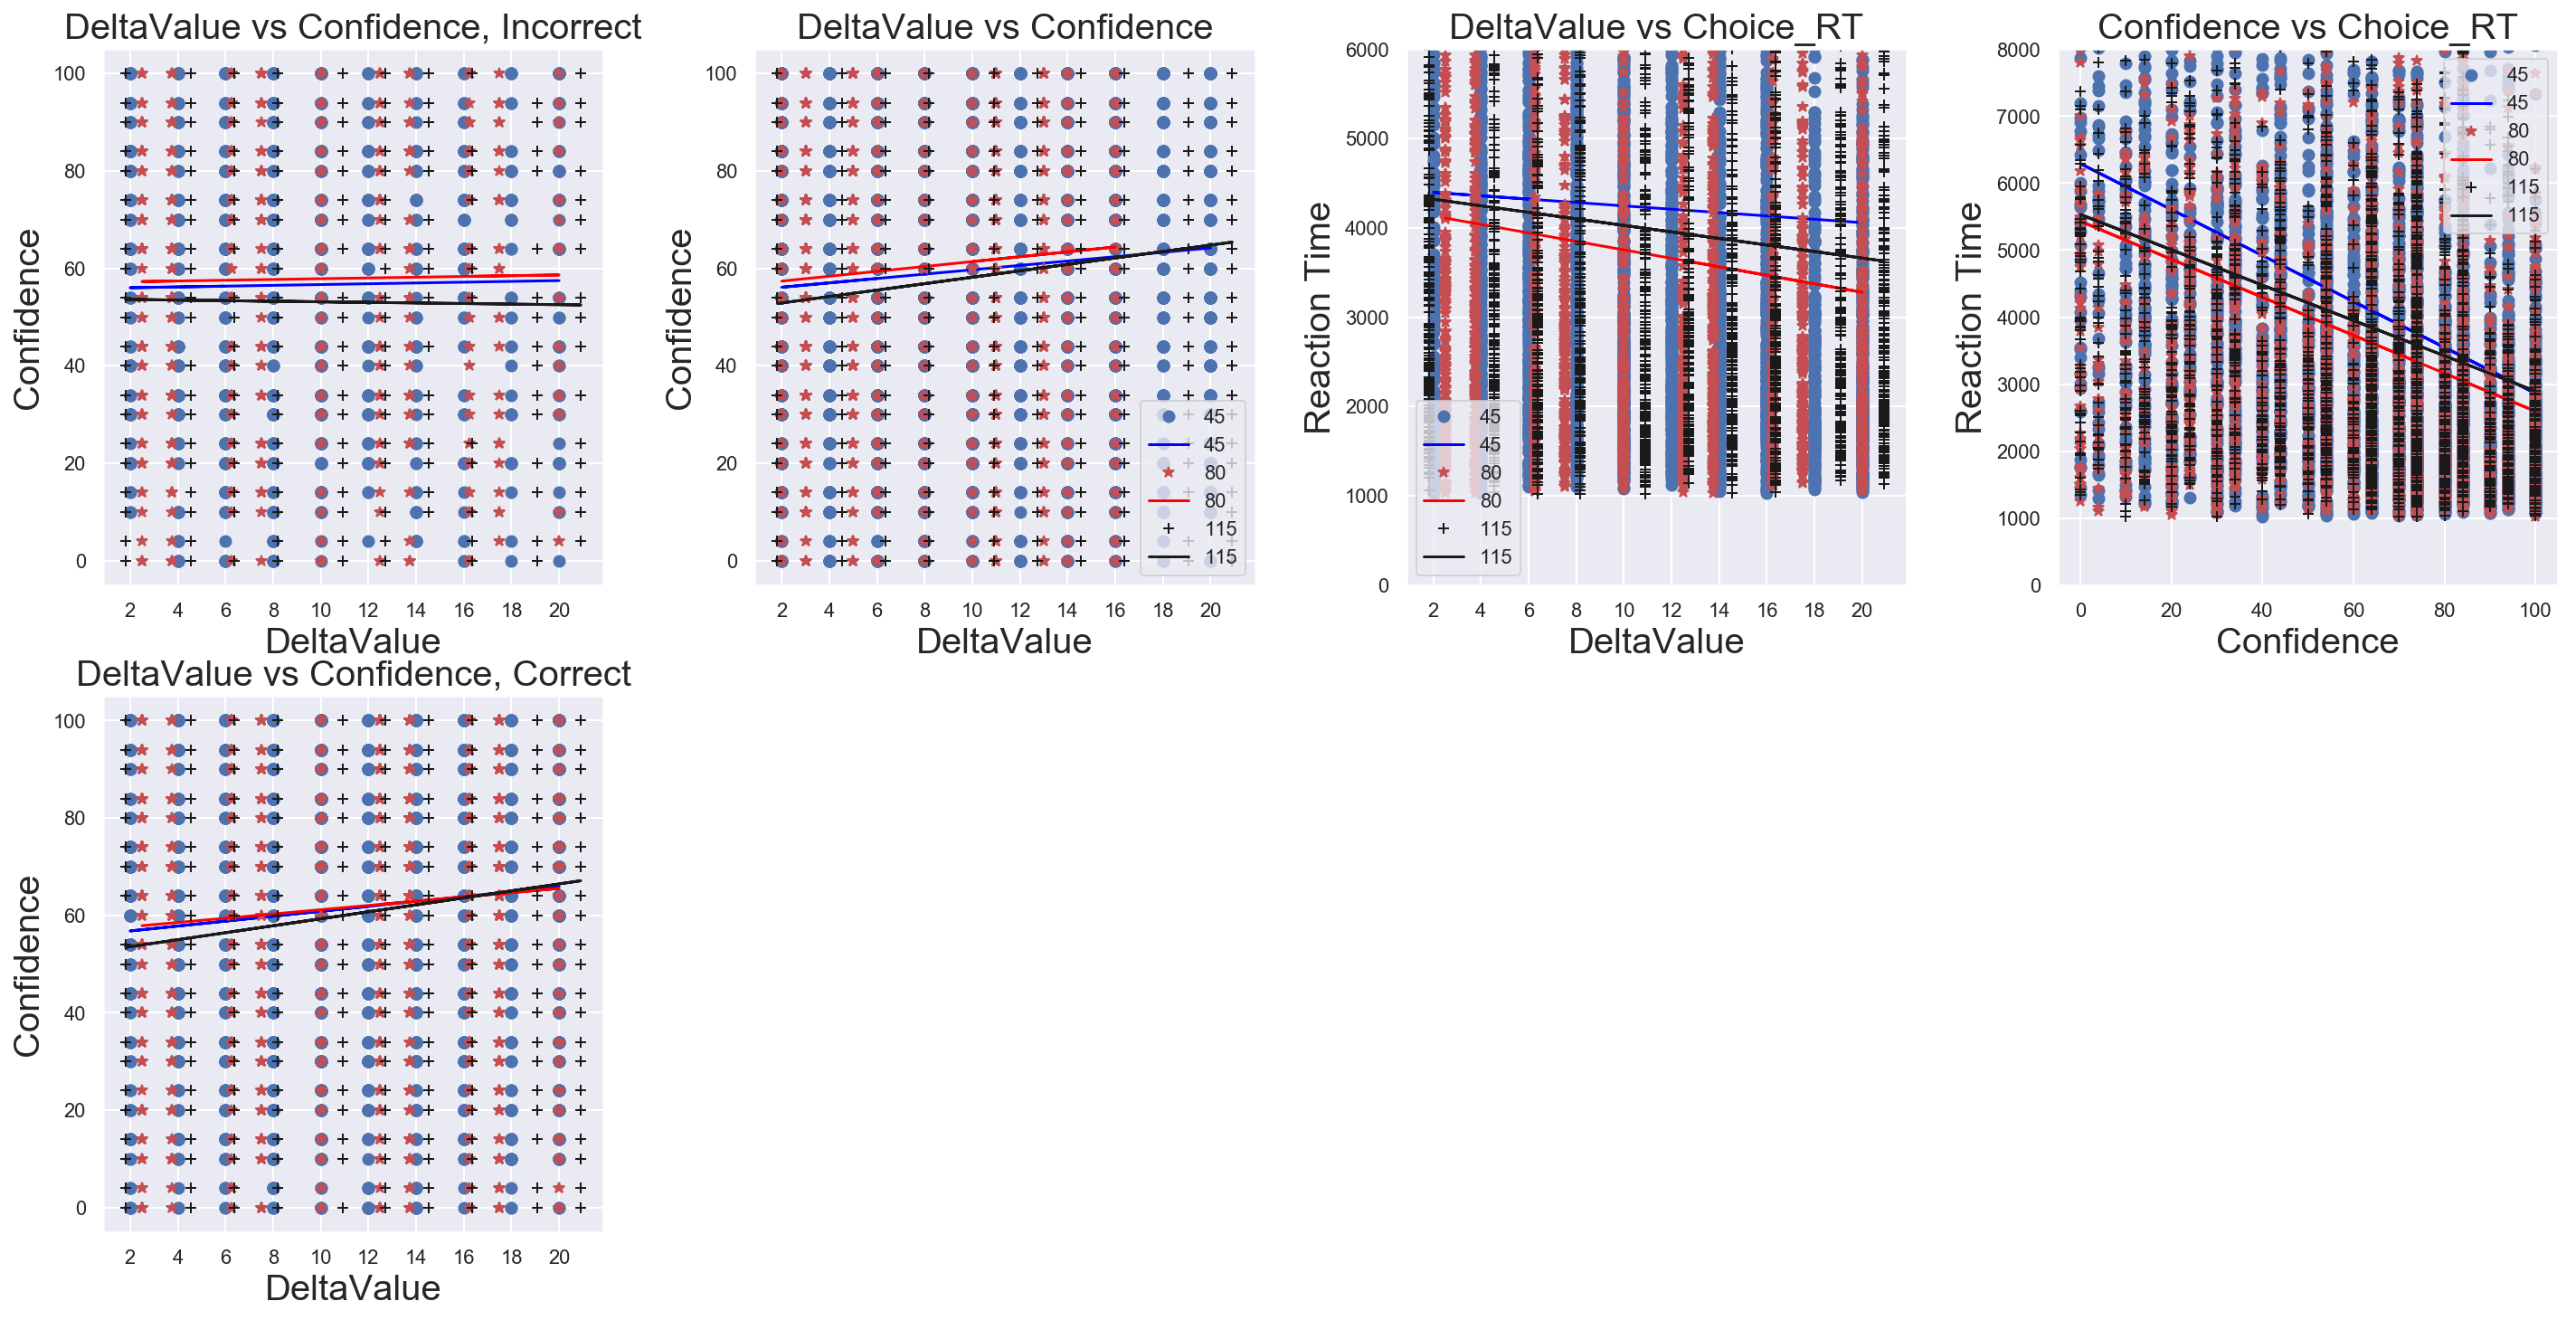

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))



plt.subplot(2,4,1)
plt.tight_layout()
title('DeltaValue vs Confidence, Incorrect',fontsize=20)
xlabel('DeltaValue', fontsize=20)
ylabel('Confidence',fontsize=20)
xticks(np.arange(0, 22, step=2))

LowC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 50.0) & (Results_StrippedPD['CORRECT'] ==-1)]
xLowCon = abs(pd.to_numeric(LowC['PercDif']))
LoCRT = pd.to_numeric(LowC['CONF'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
RT45  = plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 80.0) & (Results_StrippedPD['CORRECT'] ==-1)]
xMedCon = abs(pd.to_numeric(MedC['PercDif']))
MedCRT = pd.to_numeric(MedC['CONF'])
fitMedCRT = np.polyfit(xMedCon,MedCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
RT80  = plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = Results_StrippedPD.loc[(Results_StrippedPD['base'] ==110.0) & (Results_StrippedPD['CORRECT'] ==-1)]
xHiCon = abs(pd.to_numeric(HiC['PercDif']))
HiCRT = pd.to_numeric(HiC['CONF'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
RT115  = plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3

plt.subplot(2,4,2)
plt.tight_layout()
title('DeltaValue vs Confidence',fontsize=20)
xlabel('DeltaValue', fontsize=20)
ylabel('Confidence',fontsize=20)
xticks(np.arange(0, 22, step=2))

LowC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 50.0)]
xLowCon = abs(pd.to_numeric(LowC['PercDif']))
LoCRT = pd.to_numeric(LowC['CONF'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
RT45  = plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 80.0)]
xMedCon = abs(pd.to_numeric(MedC['variance']))
MedCRT = pd.to_numeric(MedC['CONF'])
fitMedCRT = np.polyfit(xMedCon,MedCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
RT80  = plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = Results_StrippedPD.loc[(Results_StrippedPD['base'] ==110.0)]
xHiCon = abs(pd.to_numeric(HiC['PercDif']))
HiCRT = pd.to_numeric(HiC['CONF'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
RT115  = plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3

plt.legend()

plt.subplot(2,4,3)
plt.tight_layout()
title('DeltaValue vs Choice_RT',fontsize=20)
xlabel('DeltaValue', fontsize=20)
ylabel('Reaction Time',fontsize=20)
xticks(np.arange(0, 22, step=2))
ylim(0,6000)

LowC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 50.0)]
xLowCon = abs(pd.to_numeric(LowC['PercDif']))
LoCRT = pd.to_numeric(LowC['CHOICE_RT'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
RT45  = plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 80.0)]
xMedCon = abs(pd.to_numeric(MedC['PercDif']))
MedCRT = pd.to_numeric(MedC['CHOICE_RT'])
fitMedCRT = np.polyfit(xMedCon,MedCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
RT80  = plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = Results_StrippedPD.loc[(Results_StrippedPD['base'] ==110.0)]
xHiCon = abs(pd.to_numeric(HiC['PercDif']))
HiCRT = pd.to_numeric(HiC['CHOICE_RT'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
RT115  = plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3

plt.legend()

plt.subplot(2,4,4)
plt.tight_layout()
title('Confidence vs Choice_RT',fontsize=20)
xlabel('Confidence', fontsize=20)
ylabel('Reaction Time',fontsize=20)
ylim(0,8000)

LowC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 50.0)]
xLowCon = pd.to_numeric(LowC['CONF'])
LoCRT = pd.to_numeric(LowC['CHOICE_RT'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
RT45  = plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 80.0)]
xMedCon = pd.to_numeric(MedC['CONF'])
MedCRT = pd.to_numeric(MedC['CHOICE_RT'])
fitMedCRT = np.polyfit(xMedCon,MedCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
RT80  = plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = Results_StrippedPD.loc[(Results_StrippedPD['base'] ==110.0)]
xHiCon = pd.to_numeric(HiC['CONF'])
HiCRT = pd.to_numeric(HiC['CHOICE_RT'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
RT115  = plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3
plt.legend()

plt.subplot(2,4,5)
plt.tight_layout()
title('DeltaValue vs Confidence, Correct',fontsize=20)
xlabel('DeltaValue', fontsize=20)
ylabel('Confidence',fontsize=20)
xticks(np.arange(0, 22, step=2))

LowC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 50.0) & (Results_StrippedPD['CORRECT'] ==1)]
xLowCon = abs(pd.to_numeric(LowC['PercDif']))
LoCRT = pd.to_numeric(LowC['CONF'])
fitLoCRT = np.polyfit(xLowCon,LoCRT,1)
fit_fnLowCh = np.poly1d(fitLoCRT) 
RT45  = plt.plot(xLowCon,LoCRT,'bo', xLowCon, fit_fnLowCh(xLowCon), 'blue',label='45') #, markersize=3

MedC = Results_StrippedPD.loc[(Results_StrippedPD['base'] == 80.0) & (Results_StrippedPD['CORRECT'] ==1)]
xMedCon = abs(pd.to_numeric(MedC['PercDif']))
MedCRT = pd.to_numeric(MedC['CONF'])
fitMedCRT = np.polyfit(xMedCon,MedCRT,1)
fit_fnMedCh = np.poly1d(fitMedCRT) 
RT80  = plt.plot(xMedCon,MedCRT,'r*', xMedCon, fit_fnMedCh(xMedCon), 'red',label='80') #, markersize=3

HiC = Results_StrippedPD.loc[(Results_StrippedPD['base'] ==110.0) & (Results_StrippedPD['CORRECT'] ==1)]
xHiCon = abs(pd.to_numeric(HiC['PercDif']))
HiCRT = pd.to_numeric(HiC['CONF'])
fitHiCRT = np.polyfit(xHiCon,HiCRT,1)
fit_fnHiCh = np.poly1d(fitHiCRT) 
RT115  = plt.plot(xHiCon,HiCRT,'k+', xHiCon, fit_fnHiCh(xHiCon), 'k',label='115') #, markersize=3
